In [6]:
import read_and_cache_data as rcd
from IPython.display import display
import ashrae_constants as const
import explore_data as exp

# Import the raw data

In [7]:
raw_data = rcd.get_data('ashrae-energy-prediction', cache_file='store_raw.h5')
for name in const.NAMES:
    print(f'NaNs for {name}')
    display(raw_data[name].isna().sum())

Importing data from store_raw.h5
NaNs for building_metadata


site_id           0
building_id       0
primary_use       0
square_feet       0
year_built      774
floor_count    1094
dtype: int64

NaNs for weather_train


site_id                   0
timestamp                 0
air_temperature          55
cloud_coverage        69173
dew_temperature         113
precip_depth_1_hr     50289
sea_level_pressure    10618
wind_direction         6268
wind_speed              304
dtype: int64

NaNs for weather_test


site_id                    0
timestamp                  0
air_temperature          104
cloud_coverage        140448
dew_temperature          327
precip_depth_1_hr      95588
sea_level_pressure     21265
wind_direction         12370
wind_speed               460
dtype: int64

NaNs for train


building_id      0
meter            0
timestamp        0
meter_reading    0
dtype: int64

NaNs for test


row_id         0
building_id    0
meter          0
timestamp      0
dtype: int64

### Check for large values

In [10]:
for threshold in [1_000_000, 10_000_000]:
    buildings = exp.get_buildings_with_high_meter(raw_data['train'], threshold)
    print(f'There are {len(buildings)} buildings above {threshold // 1_000_000}M meter readings')

# Plot the > 10M.
for b_id in buildings:
    data_raw['train'][train_raw.building_id == b_id][train_raw.meter == 2].meter_reading.plot()

There are 2 buildings above 1M meter readings
There are 2 buildings above 10M meter readings


NameError: name 'train_raw' is not defined

In [10]:
greater_than_a_million = train_raw[train_raw.meter_reading > 1000000]
buildings_greater_than_a_million = set(greater_than_a_million.building_id)
len_greater_than_a_million = len(greater_than_a_million.building_id)

greater_than_ten_million = train_raw[train_raw.meter_reading > 10000000]
buildings_greater_than_ten_million = set(greater_than_ten_million.building_id)
len_greater_than_ten_million = len(greater_than_ten_million.building_id)

# one building has crazy high consumption readings - no others even have meter readings greater than a million

In [11]:
buildings_greater_than_a_million

{1099}

In [12]:
buildings_greater_than_ten_million

{1099}

/anaconda3/envs/ASHRAE/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


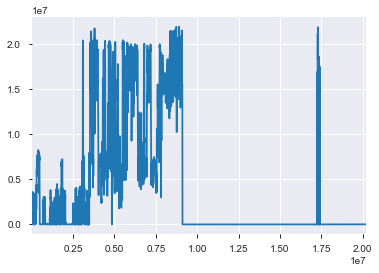

In [13]:
train_raw[train_raw.building_id == 1099][train_raw.meter == 2].meter_reading.plot()

In [14]:
building_raw[building_raw.building_id == 1099]

,site_id,building_id,primary_use,square_feet,year_built,floor_count
1099,13,1099,Education,332884,NaN,NaN


In [15]:
del greater_than_a_million, buildings_greater_than_a_million, len_greater_than_a_million
del greater_than_ten_million, buildings_greater_than_ten_million, len_greater_than_ten_million

### Strange values

In [16]:
# It is reported in this discussion by @barnwellguy that All electricity meter is 0 until May 20 for site_id == 0.
buildings_site_0 = building_raw.building_id[building_raw.site_id == 0]

In [17]:
buildings_site_0

0        0
1        1
2        2
3        3
4        4
      ... 
100    100
101    101
102    102
103    103
104    104
Name: building_id, Length: 105, dtype: int64

In [18]:
elec_bildings_site_0 = train_raw[(train_raw.building_id.isin(list(buildings_site_0))) & (train_raw.meter == 0)]

In [19]:
elec_bildings_site_0.loc[:,'timestamp'] = pd.to_datetime(elec_bildings_site_0 ['timestamp'])

/anaconda3/envs/ASHRAE/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [20]:
elec_bildings_site_0_pre_20may = elec_bildings_site_0[elec_bildings_site_0['timestamp'] < "2016-05-21"]

In [21]:
elec_bildings_site_0_pre_20may

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0000
1,1,0,2016-01-01 00:00:00,0.0000
2,2,0,2016-01-01 00:00:00,0.0000
3,3,0,2016-01-01 00:00:00,0.0000
4,4,0,2016-01-01 00:00:00,0.0000
...,...,...,...,...
7588571,100,0,2016-05-20 23:00:00,157.8080
7588572,101,0,2016-05-20 23:00:00,134.0550
7588573,102,0,2016-05-20 23:00:00,135.8740
7588574,103,0,2016-05-20 23:00:00,25.5278


In [22]:
elec_bildings_site_0_pre_20may[elec_bildings_site_0_pre_20may.meter_reading > 0]

,building_id,meter,timestamp,meter_reading
45,46,0,2016-01-01 00:00:00,53.2397
72,74,0,2016-01-01 00:00:00,43.0013
91,93,0,2016-01-01 00:00:00,52.4206
2321,20,0,2016-01-01 01:00:00,91.9886
2346,46,0,2016-01-01 01:00:00,53.6492
...,...,...,...,...
7588571,100,0,2016-05-20 23:00:00,157.8080
7588572,101,0,2016-05-20 23:00:00,134.0550
7588573,102,0,2016-05-20 23:00:00,135.8740
7588574,103,0,2016-05-20 23:00:00,25.5278


In [23]:
elec_bildings_site_0_pre_20may_pivoted = elec_bildings_site_0_pre_20may.pivot(index='timestamp',
                                     columns = 'building_id', 
                                     values = 'meter_reading')

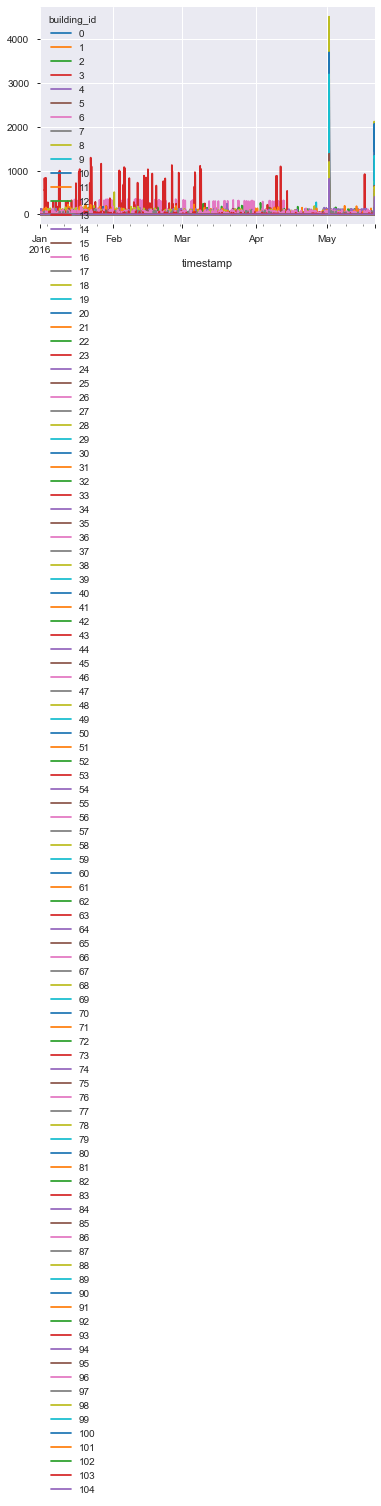

In [24]:
elec_bildings_site_0_pre_20may_pivoted.plot()
plt.show()

In [25]:
buidling_ids_with_data = set(
    elec_bildings_site_0_pre_20may[elec_bildings_site_0_pre_20may.meter_reading > 0].building_id)

In [26]:
buidling_ids_with_data

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 41,
 42,
 43,
 44,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104}

There is some data there for all of the buildings but it is very odd so delete

In [27]:
del buidling_ids_with_data, elec_bildings_site_0_pre_20may_pivoted, elec_bildings_site_0_pre_20may
del elec_bildings_site_0, buildings_site_0

### All the timestamps?

#### Weather train

In [28]:
min(weather_train_raw.timestamp)

'2016-01-01 00:00:00'

In [29]:
max(weather_train_raw.timestamp)

'2016-12-31 23:00:00'

In [30]:
len(weather_train_raw.timestamp)

139773

In [31]:
no_of_sites = len(set(weather_train_raw.site_id))

In [32]:
train_date_range = pd.date_range(start = min(weather_train_raw.timestamp), 
                                 end = max(weather_train_raw.timestamp),
                                 freq='H')

In [33]:
len(train_date_range) * no_of_sites

140544

so some weather data missing there

#### Weather test

In [34]:
min(weather_test_raw.timestamp)

'2017-01-01 00:00:00'

In [35]:
max(weather_test_raw.timestamp)

'2018-12-31 23:00:00'

In [36]:
len(weather_test_raw.timestamp)

277243

In [37]:
no_of_sites = len(set(weather_test_raw.site_id))
test_date_range = pd.date_range(start = min(weather_test_raw.timestamp), 
                                 end = max(weather_test_raw.timestamp),
                                 freq='H')
len(test_date_range) * no_of_sites

280320

So weather data is missing some timestamps

### So need to...

 - fill in NAN's in weather data
 - add missing dates to weather data and interpolate the blanks
 - Not sure what to do about building 1099's steam data - doesn't seem to be just one anomoly
 - Leave the nans in the building dataframe for now - I don't think we need to use those features
 - delete electric meter entries at site 0 buildings before the 20th of May 


## Fix them, reformat a few columns and add meter type names

In [38]:
def clean_weather_df(df_raw):
    df = df_raw.copy()
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    fulltime_range = pd.date_range(start = min(df.timestamp), 
                                 end = max(df.timestamp),
                                 freq='H')
    num_sites = list(set(df_raw.site_id))
    fulltime_temp = pd.DataFrame(product(num_sites, fulltime_range), columns=['site_id', 'timestamp'])
    df_fulltime = fulltime_temp.merge(df, on = ['site_id', 'timestamp'], how='left')
    df_fulltime = df_fulltime.groupby('site_id').apply(lambda group: group.interpolate(limit_direction='both'))
    
    return df_fulltime

# set timestamps to timestamp dtypes, add meter type names
METER_MAP = {0: 'electricity', 1: 'chilledwater', 2: 'steam', 3: 'hotwater'}

def clean_meter_df(df,meter_map=METER_MAP):
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df['meter_type'] = df['meter'].map(meter_map)                                                                                                                              
    return df


In [39]:
if os.path.exists('store_clean.h5'):
    print('Reading from hdf')
    
    with pd.HDFStore('store_clean.h5') as store_clean:
        building = store_clean['building']
        weather_train = store_clean['weather_train']
        weather_test = store_clean['weather_test']
        train = store_clean['train']
        test = store_clean['test']
        
    del weather_train_raw, weather_test_raw, train_raw, test_raw, building_raw
    
else:
    print('Processing from raw data')
    
    test = clean_meter_df(test_raw) 
    train = clean_meter_df(train_raw)
    #remove odd data at site 0
    train = train.query('not (building_id <= 104 & meter == 0 & timestamp <= "2016-05-20")') 
    building = building_raw
    
    weather_train = clean_weather_df(weather_train_raw)
    weather_test = clean_weather_df(weather_test_raw)
    
    del weather_train_raw, weather_test_raw

    with pd.HDFStore('store_clean.h5') as store_clean:
        store_clean['building'] = building
        store_clean['weather_train'] = weather_train
        store_clean['weather_test'] = weather_test
        store_clean['train'] = train
        store_clean['test'] = test
        
    del weather_train_raw, weather_test_raw, train_raw, test_raw, building_raw



Reading from hdf


In [40]:
weather_test.isna().sum()

site_id                   0
timestamp                 0
air_temperature           0
cloud_coverage        35040
dew_temperature           0
precip_depth_1_hr     52560
sea_level_pressure    17520
wind_direction            0
wind_speed                0
dtype: int64

In [41]:
weather_train.isna().sum()

site_id                   0
timestamp                 0
air_temperature           0
cloud_coverage        17568
dew_temperature           0
precip_depth_1_hr     26352
sea_level_pressure     8784
wind_direction            0
wind_speed                0
dtype: int64

In [42]:
train.isna().sum()

building_id      0
meter            0
timestamp        0
meter_reading    0
meter_type       0
dtype: int64

In [43]:
len(weather_test)

280320

# 1. Have a look at the data more generally
### 1.1 Building metadata

In [44]:
building[building.site_id == 0]

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN
...,...,...,...,...,...,...
100,0,100,Lodging/residential,24456,1968.0,NaN
101,0,101,Office,18860,1986.0,NaN
102,0,102,Office,15876,1983.0,NaN
103,0,103,Education,21657,2016.0,NaN


In [45]:
building

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN
...,...,...,...,...,...,...
1444,15,1444,Entertainment/public assembly,19619,1914.0,NaN
1445,15,1445,Education,4298,NaN,NaN
1446,15,1446,Entertainment/public assembly,11265,1997.0,NaN
1447,15,1447,Lodging/residential,29775,2001.0,NaN


In [46]:
building.describe()

,site_id,building_id,square_feet,year_built,floor_count
count,1449.000000,1449.000000,1449.000000,675.000000,355.000000
mean,6.952381,724.000000,92111.776398,1967.957037,3.740845
std,5.003432,418.434583,110769.950997,31.054030,3.333683
min,0.000000,0.000000,283.000000,1900.000000,1.000000
25%,3.000000,362.000000,23012.000000,1949.000000,1.000000
50%,5.000000,724.000000,57673.000000,1970.000000,3.000000
75%,13.000000,1086.000000,115676.000000,1995.000000,5.000000
max,15.000000,1448.000000,875000.000000,2017.000000,26.000000


In [47]:
#building.profile_report(style={'full_width':True})

## 1.2 Weather training data

In [48]:
weather_train

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,-1.0,1019.70,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,4.0,21.1,-1.0,1020.20,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.20,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.10,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.00,250.0,2.6
...,...,...,...,...,...,...,...,...,...
140539,15,2016-12-31 19:00:00,3.0,1.5,-8.0,-1.0,1007.55,180.0,5.7
140540,15,2016-12-31 20:00:00,2.8,2.0,-8.9,-1.0,1007.40,180.0,7.7
140541,15,2016-12-31 21:00:00,2.8,2.0,-7.2,-1.0,1007.50,180.0,5.1
140542,15,2016-12-31 22:00:00,2.2,2.0,-6.7,-1.0,1008.00,170.0,4.6


In [49]:
weather_train.describe()

,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,140544.000000,140544.000000,122976.000000,140544.000000,114192.000000,131760.000000,140544.000000,140544.000000
mean,7.500000,14.355675,2.633782,7.299226,2.591872,1016.142669,179.566086,3.561964
std,4.609789,10.671025,2.755691,9.823550,11.570146,7.642530,110.780692,2.333866
min,0.000000,-28.900000,0.000000,-35.000000,-1.000000,968.200000,0.000000,0.000000
25%,3.750000,7.200000,0.000000,0.600000,0.000000,1011.700000,80.000000,2.100000
50%,7.500000,15.000000,2.000000,8.200000,0.000000,1016.400000,190.000000,3.100000
75%,11.250000,22.200000,4.000000,14.400000,0.000000,1020.800000,280.000000,5.000000
max,15.000000,47.200000,9.000000,26.100000,343.000000,1045.500000,360.000000,19.000000


In [50]:
#weather_train.profile_report()

In [51]:
weather_train['timestamp'].min()

Timestamp('2016-01-01 00:00:00')

In [52]:
weather_train['timestamp'].max()

Timestamp('2016-12-31 23:00:00')

## 1.3 Consumption training data

In [53]:
train

,building_id,meter,timestamp,meter_reading,meter_type
103,105,0,2016-01-01 00:00:00,23.3036,electricity
104,106,0,2016-01-01 00:00:00,0.3746,electricity
105,106,3,2016-01-01 00:00:00,0.0000,hotwater
106,107,0,2016-01-01 00:00:00,175.1840,electricity
107,108,0,2016-01-01 00:00:00,91.2653,electricity
...,...,...,...,...,...
20216095,1444,0,2016-12-31 23:00:00,8.7500,electricity
20216096,1445,0,2016-12-31 23:00:00,4.8250,electricity
20216097,1446,0,2016-12-31 23:00:00,0.0000,electricity
20216098,1447,0,2016-12-31 23:00:00,159.5750,electricity


In [54]:
test

,row_id,building_id,meter,timestamp,meter_type
0,0,0,0,2017-01-01 00:00:00,electricity
1,1,1,0,2017-01-01 00:00:00,electricity
2,2,2,0,2017-01-01 00:00:00,electricity
3,3,3,0,2017-01-01 00:00:00,electricity
4,4,4,0,2017-01-01 00:00:00,electricity
...,...,...,...,...,...
41697595,41697595,1444,0,2018-05-09 07:00:00,electricity
41697596,41697596,1445,0,2018-05-09 07:00:00,electricity
41697597,41697597,1446,0,2018-05-09 07:00:00,electricity
41697598,41697598,1447,0,2018-05-09 07:00:00,electricity


In [55]:
train.describe()

,building_id,meter,meter_reading
count,1.986989e+07,1.986989e+07,1.986989e+07
mean,8.122948e+02,6.739836e-01,2.153994e+03
std,4.189519e+02,9.349166e-01,1.545646e+05
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.240000e+02,0.000000e+00,2.018670e+01
50%,9.030000e+02,0.000000e+00,8.200000e+01
75%,1.185000e+03,1.000000e+00,2.750100e+02
max,1.448000e+03,3.000000e+00,2.190470e+07


In [56]:
#train.profile_report()

## 2 Combined data 

### 2.1 Stick all data together, add variables for hour of day and weekend/weekday and split on meter type

In [57]:
def join_input_data_and_multi_index(meter_readings_df, building_df, weather_df):
    
    # join meter and weather data
    building_n_meter = meter_readings_df.merge(building_df, on='building_id', how='left')
    all_df = building_n_meter.merge(weather_df, on=['site_id','timestamp'], how='left')
    
    # Add time related columns
    all_df['hour'] = all_df['timestamp'].dt.hour
    all_df['weekday'] = all_df['timestamp'].dt.dayofweek
    all_df['week_number'] = all_df['timestamp'].dt.week
    all_df['month'] = all_df['timestamp'].dt.month

    all_df['is_weekend'] = all_df['weekday'].apply(lambda x: 1 if x in [0,6] else 0)
    
    
    #multi index on building id and timestamp
    all_df = all_df.set_index(['building_id', 'timestamp']).sort_index()
    
    return all_df


def split_on_meter_type(all_df):
    
    elec = all_df[all_df['meter_type'] == 'electricity']
    chilledwater = all_df[all_df['meter_type'] == 'chilledwater']
    hotwater = all_df[all_df['meter_type'] == 'hotwater']
    steam = all_df[all_df['meter_type'] == 'steam']
    
    return elec, chilledwater, hotwater, steam

In [58]:
if os.path.exists('store_split_meters.h5'):
    print('Reading from hdf')
    
    with pd.HDFStore('store_split_meters.h5') as store_split_meters:
        elec_train = store_split_meters['elec_train']
        chilledwater_train = store_split_meters['chilledwater_train']
        hotwater_train = store_split_meters['hotwater_train']
        steam_train = store_split_meters['steam_train']

#         elec_test = store_split_meters['elec_test']
#         chilledwater_test = store_split_meters['chilledwater_test']
#         hotwater_test = store_split_meters['hotwater_test']
#         steam_test = store_split_meters['steam_test']
        

    
else:
    print('Processing from cleaned dfs')
    
    print('Merging')
    train_all = join_input_data_and_multi_index(train, building, weather_train)
#    test_all = join_input_data_and_multi_index(test, building, weather_test)
    
    print('Splitting')
    elec_train, chilledwater_train, hotwater_train, steam_train = split_on_meter_type(train_all)
#    elec_test, chilledwater_test, hotwater_test, steam_test = split_on_meter_type(test_all)
    
    
    print('Writing to store')
    with pd.HDFStore('store_split_meters.h5') as store_split_meters:
        
        
        store_split_meters['elec_train'] = elec_train
        store_split_meters['chilledwater_train'] = chilledwater_train
        store_split_meters['hotwater_train'] = hotwater_train
        store_split_meters['steam_train'] = steam_train

#         store_split_meters['elec_test'] = elec_test    
#         store_split_meters['chilledwater_test'] = chilledwater_test
#         store_split_meters['hotwater_test'] = hotwater_test
#         store_split_meters['steam_test'] = steam_test
#         del test_all


Reading from hdf


In [59]:
hotwater_train.isna().sum()

meter                       0
meter_reading               0
meter_type                  0
site_id                     0
primary_use                 0
square_feet                 0
year_built             697035
floor_count           1036419
air_temperature             0
cloud_coverage          69747
dew_temperature             0
precip_depth_1_hr      105375
sea_level_pressure          0
wind_direction              0
wind_speed                  0
hour                        0
weekday                     0
week_number                 0
month                       0
is_weekend                  0
dtype: int64

### 2.2 Correlate features with meter reading for each building and meter type

In [60]:
CORRELATORS = ['air_temperature', 'cloud_coverage', 'dew_temperature','precip_depth_1_hr', 'sea_level_pressure',
               'wind_direction','wind_speed', 'hour', 'weekday', 'month', 'is_weekend']
def produce_correlation_df(train_df, y_variable='meter_reading', buildings=None,  correlators=CORRELATORS):
    if buildings==None:
        buildings = list(set(train_df.index.get_level_values('building_id')))
    correlations_df = pd.DataFrame()
    for building_id in buildings:
        df =  train_df.loc[building_id] 
        correlations = df.corr()[y_variable]
        correlations = correlations[correlators]
        correlations_df[building_id] = correlations
    correlations_df['mean'] = correlations_df.mean(axis=1)
    correlations_df['st_dev'] = correlations_df.std(axis=1)
    correlations_df = correlations_df.T
    correlations_df.sort_values(by='mean', axis=1, ascending=False)
    
    return correlations_df

def plot_correlation_distribution(correlations_df):
    for variable in correlations_df.columns:
        sns.distplot(list(correlations_df[variable].dropna()), label=variable)
    plt.legend()
    plt.show()

def plot_correlation_values(correlations_df):
    correlations_df.drop(['mean', 'st_dev'], axis=0).plot()
    plt.show()
    
def explore_correlations(buildings_correlations):
    
    plot_correlation_values(buildings_correlations)
    plot_correlation_distribution(buildings_correlations)
    plot_correlation_distribution(buildings_correlations[['air_temperature', 'dew_temperature']])

In [61]:
# take a subset of the buildings to check 
building_subset = list(range(30))
elec_train_subset = elec_train[elec_train.index.get_level_values('building_id').isin(building_subset)]
elec_buildings_subset_correlations = produce_correlation_df(elec_train_subset, buildings=building_subset)

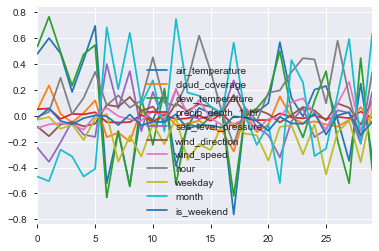

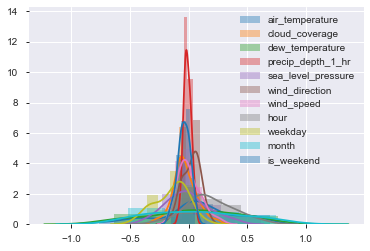

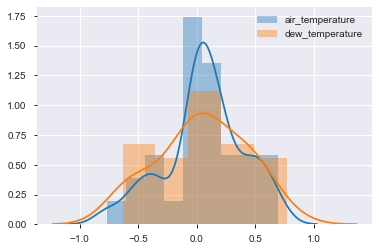

In [62]:
explore_correlations(elec_buildings_subset_correlations)

In [63]:
del building_subset, elec_train_subset, elec_buildings_subset_correlations

#### Electric meters

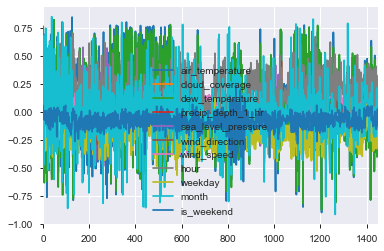

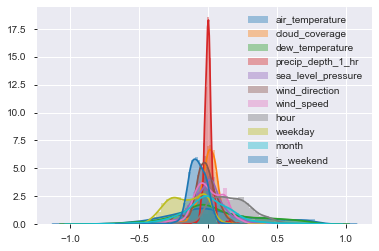

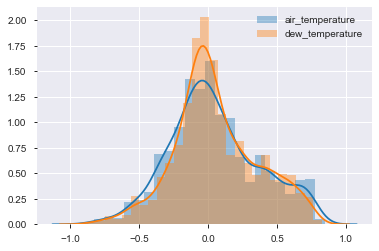

In [64]:
elec_correlations = produce_correlation_df(elec_train)
explore_correlations(elec_correlations)

In [65]:
elec_correlations

,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,weekday,month,is_weekend
0,0.479453,0.047962,0.535181,0.050461,-0.247728,-0.084806,-0.095086,-0.009434,-0.030687,-0.469898,-0.016915
1,0.600476,0.234716,0.765343,0.056727,-0.355877,-0.157504,-0.066455,0.030900,-0.008356,-0.505148,0.057425
2,0.483044,0.014300,0.492570,-0.023997,-0.205388,-0.066620,-0.057822,0.293703,-0.100593,-0.261834,-0.039994
3,0.183932,-0.052511,0.232867,0.014609,-0.042823,-0.049127,-0.066589,0.013243,-0.066523,-0.314317,-0.065291
4,0.432766,0.022912,0.474896,0.011035,-0.145271,-0.081540,-0.108159,0.138171,-0.186284,-0.469822,-0.018406
...,...,...,...,...,...,...,...,...,...,...,...
1446,-0.069268,-0.017234,0.007961,0.008024,0.038454,-0.095599,-0.068407,0.004068,-0.304842,0.019892,-0.118016
1447,0.052228,0.033906,-0.016076,-0.001984,0.055434,0.076326,0.051861,0.283703,0.009565,0.109691,0.026366
1448,-0.286418,-0.004531,-0.223446,-0.031048,0.055149,-0.048086,0.016022,-0.033078,-0.322307,-0.033290,-0.124148
mean,0.046573,0.004808,0.055722,0.001250,-0.001781,-0.029812,0.004165,0.167293,-0.156134,-0.004406,-0.078404


#### Chilled water meters

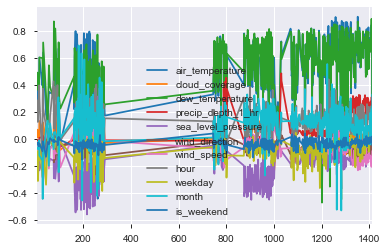

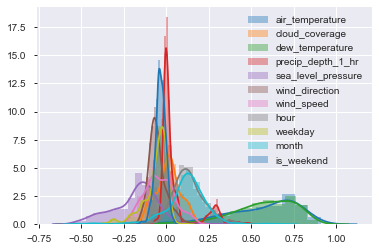

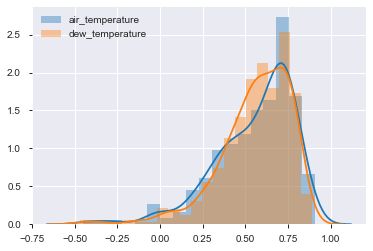

In [66]:
chilledwater_correlations = produce_correlation_df(chilledwater_train)
explore_correlations(chilledwater_correlations)

In [67]:
chilledwater_correlations

,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,weekday,month,is_weekend
7,0.424002,0.071635,0.494088,-0.004128,-0.227254,-0.084170,-0.049827,0.287845,-0.087728,-0.066949,-0.039489
9,0.268141,0.012373,0.365835,-0.010351,-0.155910,-0.067023,-0.118621,0.128753,-0.308224,-0.072108,-0.023579
13,0.323971,0.038770,0.393213,-0.017356,-0.148888,-0.057188,-0.073561,0.342243,-0.120963,-0.012673,-0.045396
14,0.334491,0.014743,0.364066,-0.019171,-0.123496,-0.038146,-0.064284,0.399063,-0.153019,-0.006096,-0.052010
15,0.606094,0.136250,0.606535,0.011417,-0.229724,-0.081948,-0.069280,0.304497,-0.031344,-0.119134,-0.029884
...,...,...,...,...,...,...,...,...,...,...,...
1411,0.733632,0.047392,0.725497,0.303163,-0.036241,-0.071001,-0.140169,0.153633,0.022311,0.126722,0.004288
1412,0.678932,0.025365,0.739027,0.260449,-0.084249,-0.133077,-0.198174,0.059920,0.002571,0.115970,0.021220
1413,-0.036651,0.009435,-0.077512,0.035317,0.001914,-0.036326,-0.086417,0.031942,0.114168,0.332291,-0.044914
mean,0.556128,0.010204,0.561056,0.054458,-0.184050,-0.052474,-0.039252,0.134112,-0.062602,0.117880,-0.033610


#### Hot water meters

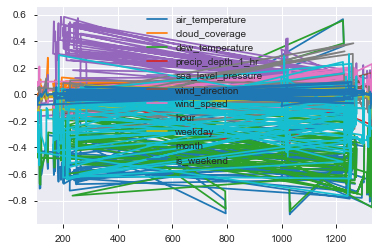

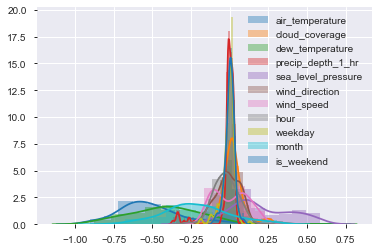

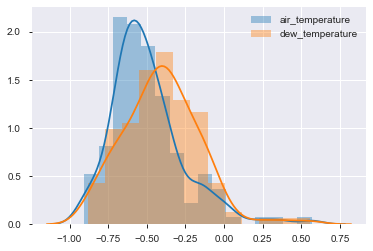

In [68]:
hotwater_correlations = produce_correlation_df(hotwater_train)
explore_correlations(hotwater_correlations)

In [69]:
hotwater_correlations

,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,weekday,month,is_weekend
1028,-0.724895,NaN,-0.719822,-0.259861,0.166679,0.000623,0.136966,0.109893,-0.130129,-0.310150,-0.054951
1029,-0.903725,NaN,-0.881313,-0.367781,0.108897,-0.014381,0.172808,0.045401,-0.007495,-0.336249,0.020300
1030,-0.900860,NaN,-0.876608,-0.331058,0.131220,-0.000029,0.173128,-0.047523,-0.018002,-0.278813,0.022347
1031,-0.857283,NaN,-0.814728,-0.295363,0.113775,-0.013870,0.129094,-0.069886,-0.014902,-0.342549,0.023081
1032,-0.894230,NaN,-0.870511,-0.340441,0.092877,-0.003847,0.188206,0.049742,-0.017053,-0.322075,-0.000997
...,...,...,...,...,...,...,...,...,...,...,...
1018,-0.300448,0.107667,-0.112113,0.030009,0.089513,-0.018463,-0.015632,0.012143,0.017224,-0.216491,0.052807
1021,-0.022167,-0.067479,-0.129746,-0.004038,0.084693,-0.006006,-0.022745,-0.038819,-0.004071,0.188373,0.003876
1022,-0.644122,0.251403,-0.503518,0.004990,0.420730,-0.013539,-0.132544,-0.104196,-0.025858,-0.469525,0.002485
mean,-0.500971,0.024698,-0.410522,-0.017821,0.198446,-0.010355,0.004840,-0.021539,-0.008467,-0.217748,0.000295


#### Steam meters

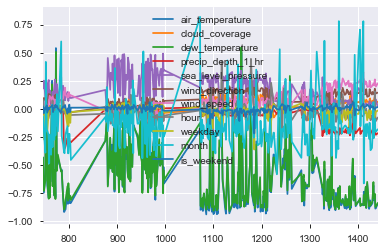

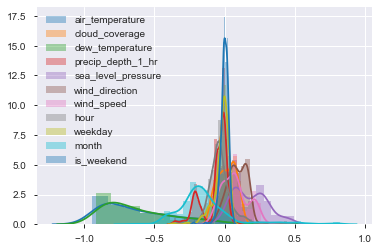

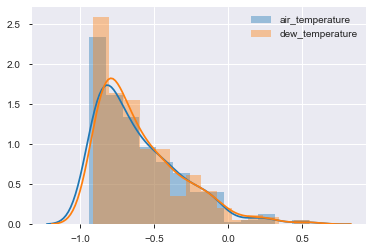

In [70]:
steam_correlations = produce_correlation_df(steam_train)
explore_correlations(steam_correlations)

In [71]:
steam_correlations

,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,weekday,month,is_weekend
745,-0.437014,-0.055568,-0.432730,-0.046587,0.180571,0.057548,0.037162,0.079282,-0.273449,-0.066190,0.021028
747,-0.747052,-0.022598,-0.732330,-0.039746,0.250665,0.096633,0.046386,-0.041600,-0.069678,-0.202884,-0.039238
750,-0.586364,0.005708,-0.638546,-0.031567,0.108340,0.088990,0.066371,-0.037588,0.003088,-0.390740,0.012278
751,0.221421,-0.047647,0.205491,0.004521,0.090945,-0.028328,-0.034415,0.005940,-0.016350,0.417677,-0.000337
753,-0.261218,0.007079,-0.277426,-0.011184,0.011643,0.046622,0.023403,0.027700,-0.009569,-0.191835,0.030470
...,...,...,...,...,...,...,...,...,...,...,...
1437,-0.889911,0.071112,-0.875337,-0.216061,0.073171,0.153968,0.223455,-0.059314,-0.053340,-0.202942,0.002921
1438,-0.884872,0.043236,-0.872149,-0.231689,0.082951,0.136652,0.198182,-0.109866,-0.028427,-0.204159,0.011748
1442,-0.847074,0.063927,-0.838951,-0.217967,0.013701,0.143993,0.225977,-0.078038,-0.014756,-0.182990,0.014930
mean,-0.609241,0.015135,-0.594468,-0.067150,0.178128,0.088515,0.072631,-0.029219,-0.021971,-0.139339,-0.000548


## 2.3 Integrate data over a week and look at impact of weather variables then (to take away time dependance)

In [72]:
WEEKLY_ATTRIBUTES = ['meter_reading','air_temperature', 'cloud_coverage', 'dew_temperature','precip_depth_1_hr',
                     'sea_level_pressure', 'wind_direction','wind_speed', 'week_number', 'month']
WEEKLY_CORRELATORS = ['air_temperature', 'cloud_coverage', 'dew_temperature','precip_depth_1_hr',
                      'sea_level_pressure', 'wind_direction','wind_speed', 'month']

In [73]:
def produce_weekly_average_data(df, weekly_attributes=WEEKLY_ATTRIBUTES):
    df_weekly_means = df[weekly_attributes].groupby(['building_id', 'week_number']).mean()
    df_weekly_means['building_id'] = list(df_weekly_means.index.get_level_values('building_id'))
    return df_weekly_means

def produce_weekly_degree_hours(df, set_point_temp):
    df_temp = df[['meter_reading','air_temperature','week_number']].copy()
    df_temp['delta_temp'] = df_temp['air_temperature'] - set_point_temp
    df_temp = df_temp.drop(columns='air_temperature')
    df_weekly_dh = df_temp.groupby(['building_id', 'week_number']).sum()  
    df_weekly_dh['building_id'] = list(df_weekly_dh.index.get_level_values('building_id'))
    return df_weekly_dh
    

In [74]:
set_point_C = 13

#### Electric meters

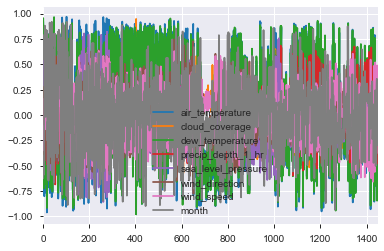

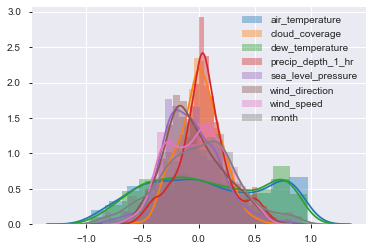

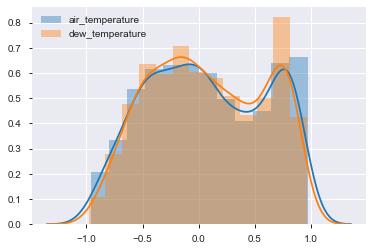

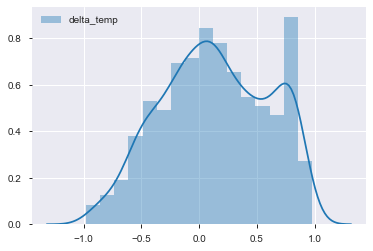

In [75]:
elec_weekly_means_df = produce_weekly_average_data(elec_train)
elec_weekly_means_corrs = produce_correlation_df(elec_weekly_means_df, correlators=WEEKLY_CORRELATORS)

elec_weekly_dh_df = produce_weekly_degree_hours(elec_train, set_point_C )
elec_weekly_dh_corrs = produce_correlation_df(elec_weekly_dh_df , correlators=['delta_temp'])

explore_correlations(elec_weekly_means_corrs)
plot_correlation_distribution(elec_weekly_dh_corrs )

#### Chilled water meters

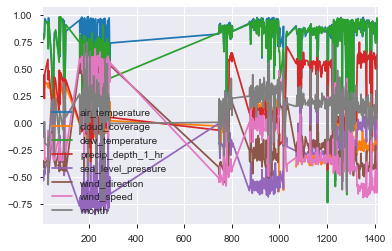

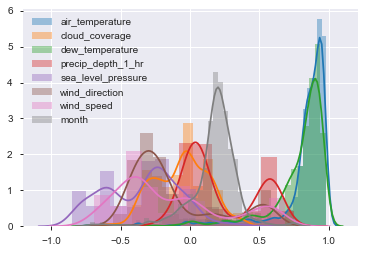

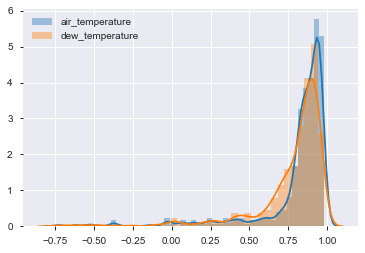

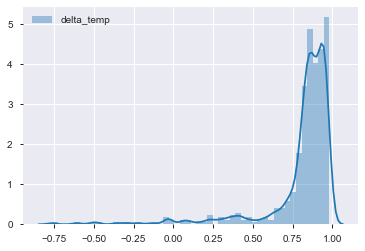

In [76]:
chilledwater_weekly_means_df = produce_weekly_average_data(chilledwater_train)
chilledwater_weekly_means_corrs = produce_correlation_df(chilledwater_weekly_means_df ,
                                                         correlators=WEEKLY_CORRELATORS)

chilledwater_weekly_dh_df = produce_weekly_degree_hours(chilledwater_train, set_point_C )
chilledwater_weekly_dh_corrs = produce_correlation_df(chilledwater_weekly_dh_df, correlators=['delta_temp'])

explore_correlations(chilledwater_weekly_means_corrs)
plot_correlation_distribution(chilledwater_weekly_dh_corrs )

#### Hot water meters

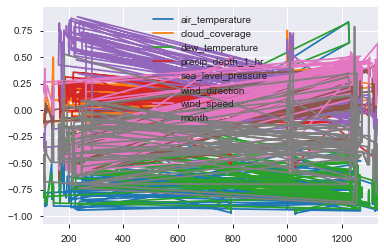

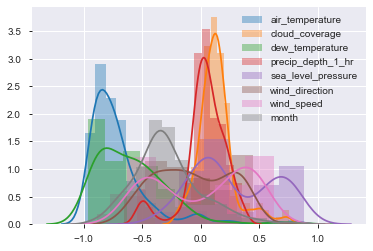

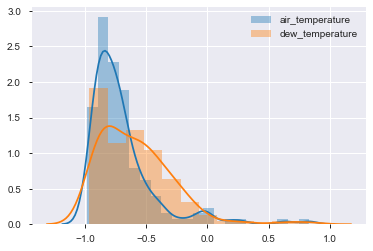

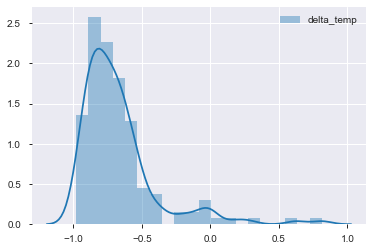

In [77]:
hotwater_weekly_means_df = produce_weekly_average_data(hotwater_train)
hotwater_weekly_means_corrs = produce_correlation_df(hotwater_weekly_means_df , correlators=WEEKLY_CORRELATORS)

hotwater_weekly_dh_df = produce_weekly_degree_hours(hotwater_train, set_point_C )
hotwater_weekly_dh_corrs = produce_correlation_df(hotwater_weekly_dh_df, correlators=['delta_temp'])

explore_correlations(hotwater_weekly_means_corrs)
plot_correlation_distribution(hotwater_weekly_dh_corrs )

#### Steam meters

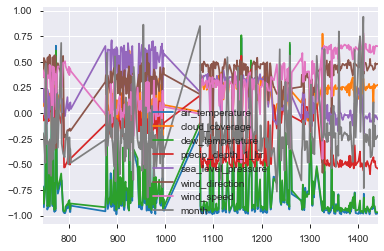

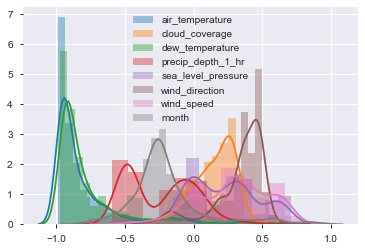

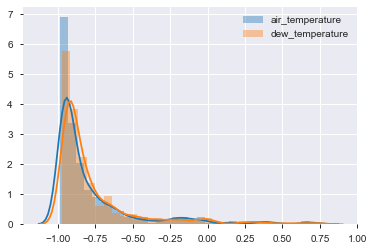

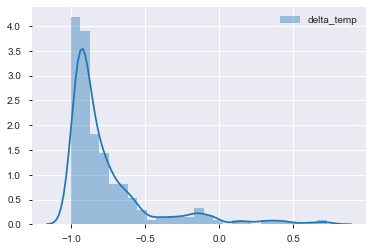

In [78]:
steam_weekly_means_df = produce_weekly_average_data(steam_train)
steam_weekly_means_corrs = produce_correlation_df(steam_weekly_means_df , correlators=WEEKLY_CORRELATORS)

steam_weekly_dh_df = produce_weekly_degree_hours(steam_train, set_point_C )
steam_weekly_dh_corrs = produce_correlation_df(steam_weekly_dh_df, correlators=['delta_temp'])

explore_correlations(steam_weekly_means_corrs)
plot_correlation_distribution(steam_weekly_dh_corrs)

## 2.4 Compare strength of different correlators

In [79]:
def compare_distributions(df_dict, variable_name_dict, title):
    for df_name, df in df_dict.items():
        sns.distplot(list(df[variable_name_dict[df_name]].dropna()), label=df_name)
    plt.title(title)
    plt.legend()
    plt.show()


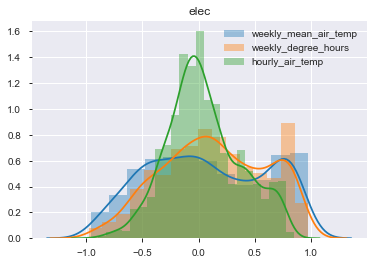

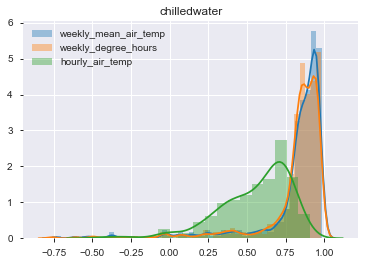

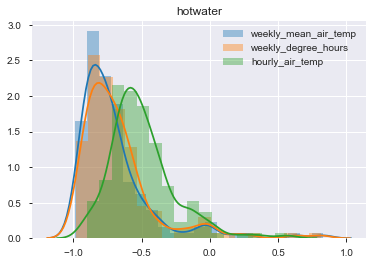

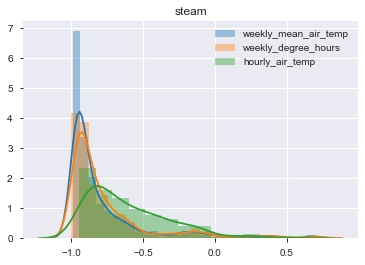

In [80]:
variable_name_dict = {'weekly_mean_air_temp':'air_temperature',
                      'weekly_degree_hours':'delta_temp',
                      'hourly_air_temp':'air_temperature'}

compare_distributions({'weekly_mean_air_temp':elec_weekly_means_corrs, 
                      'weekly_degree_hours':elec_weekly_dh_corrs,
                      'hourly_air_temp':elec_correlations},
                      variable_name_dict,
                     'elec')

compare_distributions({'weekly_mean_air_temp':chilledwater_weekly_means_corrs,
                      'weekly_degree_hours':chilledwater_weekly_dh_corrs,
                      'hourly_air_temp':chilledwater_correlations},
                     variable_name_dict, 'chilledwater')

compare_distributions({'weekly_mean_air_temp':hotwater_weekly_means_corrs,
                      'weekly_degree_hours':hotwater_weekly_dh_corrs,
                      'hourly_air_temp':hotwater_correlations},
                     variable_name_dict, 'hotwater')

compare_distributions({'weekly_mean_air_temp':steam_weekly_means_corrs,
                      'weekly_degree_hours':steam_weekly_dh_corrs,
                      'hourly_air_temp':steam_correlations},
                     variable_name_dict,
                     'steam')

# 3. Linear regression model based on air temperature only

Assume that form of equation is meter_reading = A.T(t) + B + f(t) where B = A.T_setpoint. <br>

In [81]:
def fit_linear_regression_to_air_temp_data(df):
    
    building_ids = list(set(df.index.get_level_values('building_id')))
    df_results = pd.DataFrame(index=building_ids, columns = ['r_sq', 'intercept', 'temp_coef', 'set_point_temp'])
    df_results.index.rename('building_id', inplace=True)
    
    for building_id in building_ids:
        building_df = df.loc[building_id]
        y=building_df['meter_reading'].to_numpy()
        x=building_df['air_temperature'].to_numpy().reshape(-1, 1)
        imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
        x=imp_mean.fit_transform(x)
        model=LinearRegression(n_jobs=-1).fit(x,y)
        r_sq = model.score(x, y)
        df_results.loc[building_id, 'r_sq'] = r_sq
        df_results.loc[building_id, 'intercept'] = model.intercept_
        df_results.loc[building_id, 'temp_coef'] = model.coef_[0]
        df_results.loc[building_id, 'set_point_temp'] = -model.intercept_/model.coef_[0]
        
    for col in list(df_results):
        df_results[col] = pd.to_numeric(df_results[col])
        
    return df_results

In [82]:
#alternative where you throw away weeks that have 0 average meter reading for that week - save that week number

## 3.1 Air temperature - weekly averages

Integrate out the time dependancy by looking at entire weeks

Start by just fitting a from weekly_meter_reading = A.T_mean + B

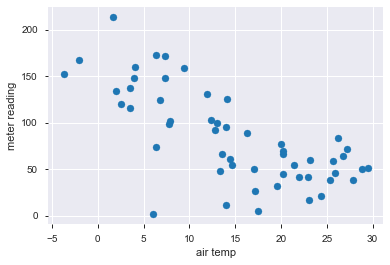

In [83]:
building_df = steam_weekly_means_df.loc[745]
y=building_df['meter_reading'].to_numpy()
x=building_df['air_temperature'].to_numpy()
plt.xlabel('air temp')
plt.ylabel('meter reading')
plt.scatter(x,y)
plt.show()

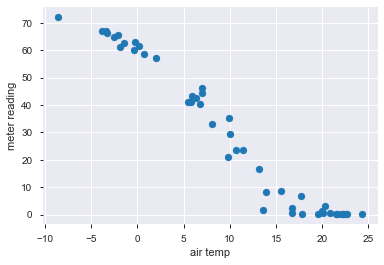

In [84]:
building_df = steam_weekly_means_df.loc[1442]
y=building_df['meter_reading'].to_numpy()
x=building_df['air_temperature'].to_numpy()
plt.xlabel('air temp')
plt.ylabel('meter reading')
plt.scatter(x,y)
plt.show()

### 3.1.1 Fit model

In [85]:
df_steam_weekly_results = fit_linear_regression_to_air_temp_data(steam_weekly_means_df)
df_chilledwater_weekly_results = fit_linear_regression_to_air_temp_data(chilledwater_weekly_means_df)
df_hotwater_weekly_results = fit_linear_regression_to_air_temp_data(hotwater_weekly_means_df)
df_elec_weekly_results = fit_linear_regression_to_air_temp_data(elec_weekly_means_df) 

In [86]:
#stick them all together for use later
df_elec_weekly_results['meter'] = 0
df_chilledwater_weekly_results['meter'] = 1
df_steam_weekly_results['meter'] = 2
df_hotwater_weekly_results['meter'] = 3


df_weekly_results = pd.concat([df_elec_weekly_results, df_chilledwater_weekly_results,
           df_hotwater_weekly_results, df_steam_weekly_results])

In [87]:
METERS_NUMBER_NAME = {0: 'elec', 1: 'chilledwater', 2: 'steam', 3: 'hotwater'}
def compare_variables_in_df_between_meters(df, variables, meters_number_name = METERS_NUMBER_NAME):
    for variable in variables:
        variable_name_dict = {}
        df_dict = {}
        for meter_no, meter_name in meters_number_name.items():
            variable_name_dict[meter_name] = variable
            df_dict[meter_name] = df[df.meter == meter_no]
        #print(variable_name_dict)
        #print(df_dict)
        compare_distributions(df_dict, variable_name_dict, variable)

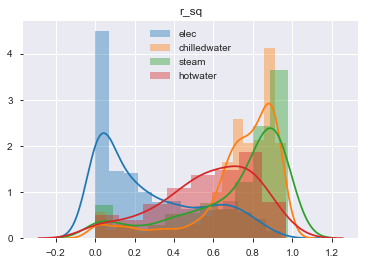

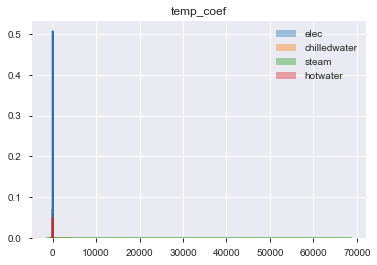

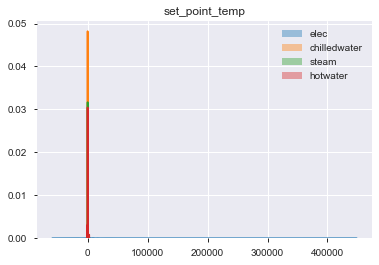

In [88]:
compare_variables_in_df_between_meters(df_weekly_results, ['r_sq', 'temp_coef', 'set_point_temp'])

In [89]:
# so there are some very non-physical results for temp coef and set point temp in the steam data set
#and the ? elec? dataset.Plot seperately to be sure which datasets have odd results

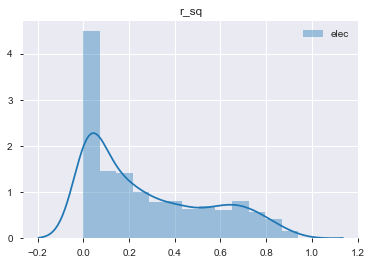

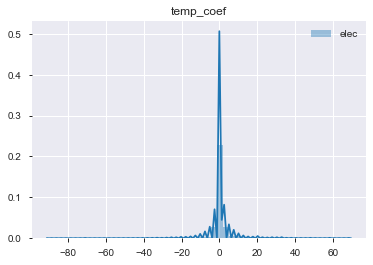

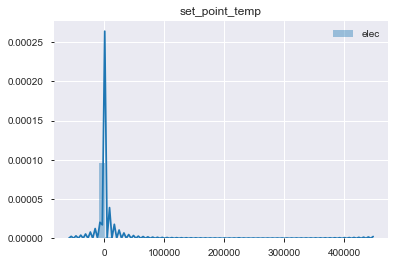

In [90]:
compare_variables_in_df_between_meters(df_weekly_results, ['r_sq', 'temp_coef', 'set_point_temp'],
                                      meters_number_name={0: 'elec'})

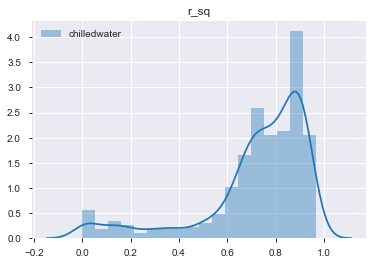

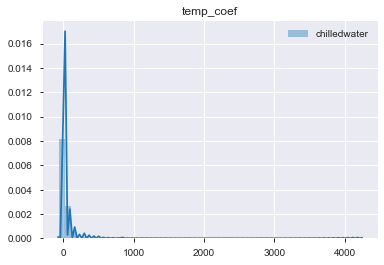

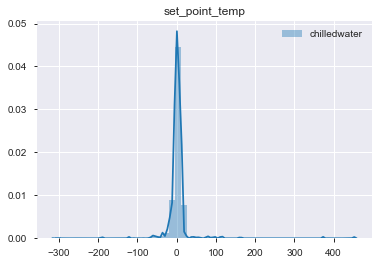

In [91]:
compare_variables_in_df_between_meters(df_weekly_results, ['r_sq', 'temp_coef', 'set_point_temp'],
                                      meters_number_name={1: 'chilledwater'})

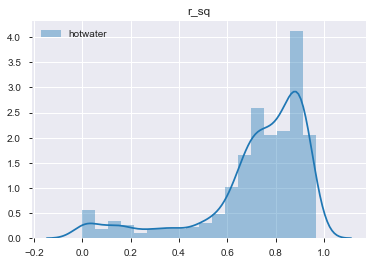

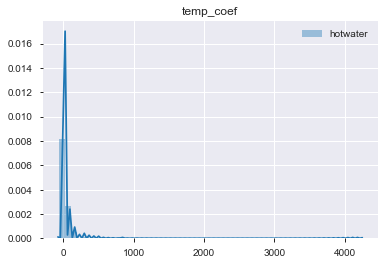

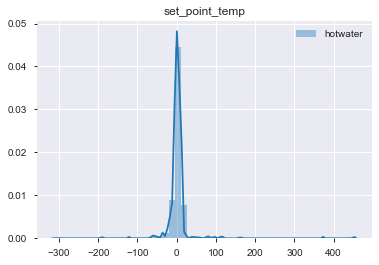

In [92]:
compare_variables_in_df_between_meters(df_weekly_results, ['r_sq', 'temp_coef', 'set_point_temp'],
                                      meters_number_name={1: 'hotwater'})

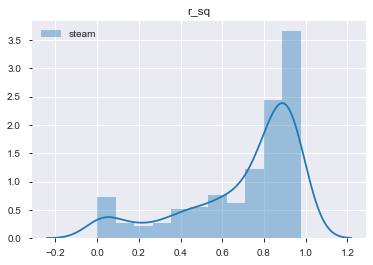

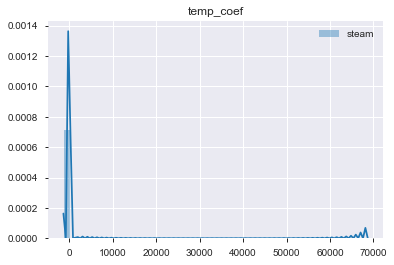

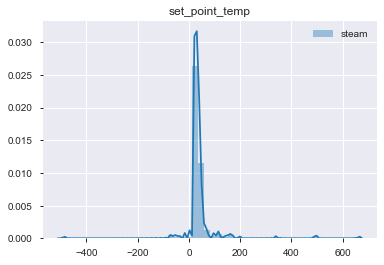

In [93]:
compare_variables_in_df_between_meters(df_weekly_results, ['r_sq', 'temp_coef', 'set_point_temp'],
                                      meters_number_name={2: 'steam'})

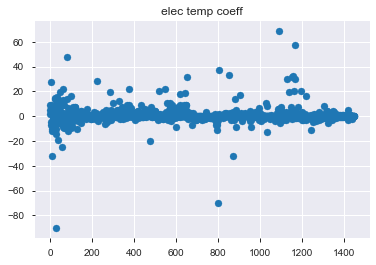

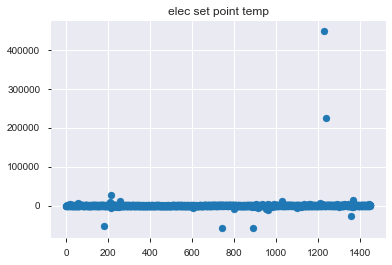

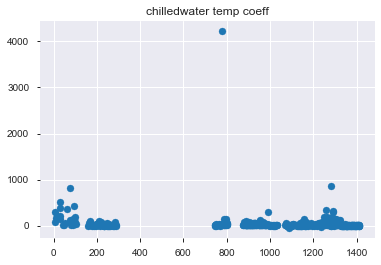

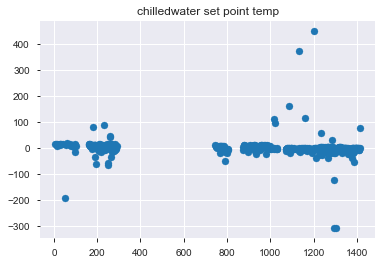

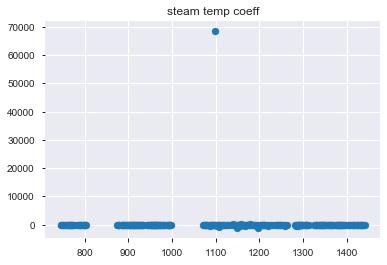

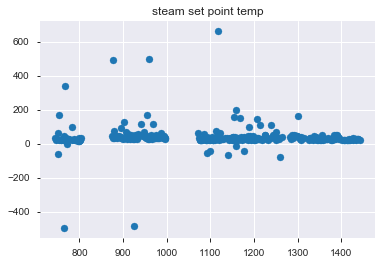

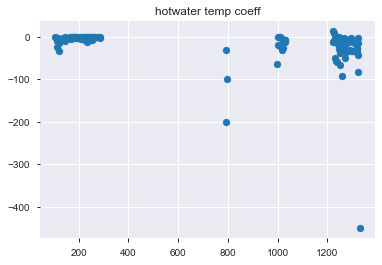

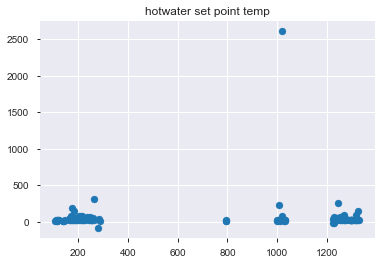

In [94]:
for meter_no, meter_name in METERS_NUMBER_NAME.items():
    df_to_plot = df_weekly_results[df_weekly_results.meter == meter_no]
    plt.scatter(df_to_plot.index, df_to_plot.temp_coef)
    plt.title(meter_name + " temp coeff")
    plt.show()
    plt.scatter(df_to_plot.index, df_to_plot.set_point_temp)
    plt.title(meter_name + " set point temp")
    plt.show()
    

In [95]:
# All have some very unphysical values in there. Leave for now but maybe address later

In [96]:
chilledwater_weekly_means_df[chilledwater_weekly_means_df.meter_reading < 1]

meter_reading  air_temperature  cloud_coverage  \
building_id week_number                                                   
7           45                     0.0        20.322619        3.973214   
            46                     0.0        18.643452        2.589286   
            47                     0.0        18.358333        3.005952   
9           50                     0.0        21.360714        3.508929   
            51                     0.0        20.107738        4.505952   
...                                ...              ...             ...   
1412        49                     0.0        -1.595238        1.945813   
            50                     0.0        -3.895238        2.685140   
            51                     0.0        -2.526786        1.845238   
            52                     0.0        -0.381597        2.194444   
            53                     0.0        -1.493056        4.000000   

                         dew_temperature  precip_depth_1_hr  \
building_id week_number                                       
7           45                 13.276786          -0.029762   
            46                 11.753571          -0.017857   
            47                 10.602976           0.000000   
9           50                 16.519643          -0.005952   
            51                 16.157143           1.130952   
...                                  ...                ...   
1412        49                 -4.622619          -0.035714   
            50                 -7.751786           0.148810   
            51                 -6.814583          -0.831691   
            52                 -3.952083           1.435584   
            53                 -4.368056          -1.000000   

                         sea_level_pressure  wind_direction  wind_speed  \
building_id week_number                                                   
7           45                  1019.371429      141.934524    2.595238   
            46                  1018.026190      217.678571    2.855357   
            47                  1021.355952      184.523810    2.735714   
9           50                  1019.891964      148.928571    2.702381   
            51                  1024.321429      151.577381    3.182143   
...                                     ...             ...         ...   
1412        49                  1019.707738      201.130952    3.861607   
            50                  1015.579167      222.767857    5.643155   
            51                  1026.781250      196.190476    3.694940   
            52                  1014.625000      208.819444    5.333333   
            53                  1019.400000      272.083333    4.162500   

                         month  building_id  
building_id week_number                      
7           45            11.0            7  
            46            11.0            7  
            47            11.0            7  
9           50            12.0            9  
            51            12.0            9  
...                        ...          ...  
1412        49            12.0         1412  
            50            12.0         1412  
            51            12.0         1412  
            52            12.0         1412  
            53             1.0         1412  

[2690 rows x 10 columns]

In [97]:
elec_weekly_means_df[elec_weekly_means_df.meter_reading < 1]

meter_reading  air_temperature  cloud_coverage  \
building_id week_number                                                   
29          20                0.000000        30.425000        4.750000   
            23                0.000000        30.300000        6.000000   
45          20                0.000000        25.960563        4.788732   
            21                0.000000        25.600000        3.380952   
            22                0.000000        27.097024        4.208333   
...                                ...              ...             ...   
1359        27                0.000000        22.253274        1.672619   
            28                0.000000        22.239286        2.089286   
1446        51                0.877827        -2.526786        1.845238   
            52                0.727604        -0.381597        2.194444   
            53                0.953819        -1.493056        4.000000   

                         dew_temperature  precip_depth_1_hr  \
building_id week_number                                       
29          20                 13.725000           0.000000   
            23                 21.250000           0.000000   
45          20                 19.833803           0.197183   
            21                 17.076786          -0.035714   
            22                 21.185714           3.976190   
...                                  ...                ...   
1359        27                 16.466964           9.807179   
            28                 15.893452          10.434524   
1446        51                 -6.814583          -0.831691   
            52                 -3.952083           1.435584   
            53                 -4.368056          -1.000000   

                         sea_level_pressure  wind_direction  wind_speed  \
building_id week_number                                                   
29          20                  1010.725000      285.000000    7.975000   
            23                  1016.950000      122.500000    2.200000   
45          20                  1015.416901      200.985915    3.200000   
            21                  1017.663690      103.065476    3.399405   
            22                  1015.546429      135.327381    2.664286   
...                                     ...             ...         ...   
1359        27                  1010.995833      180.238095    2.702976   
            28                  1015.914286      160.863095    2.798512   
1446        51                  1026.781250      196.190476    3.694940   
            52                  1014.625000      208.819444    5.333333   
            53                  1019.400000      272.083333    4.162500   

                             month  building_id  
building_id week_number                          
29          20            5.000000           29  
            23            6.000000           29  
45          20            5.000000           45  
            21            5.000000           45  
            22            5.714286           45  
...                            ...          ...  
1359        27            7.000000         1359  
            28            7.000000         1359  
1446        51           12.000000         1446  
            52           12.000000         1446  
            53            1.000000         1446  

[1662 rows x 10 columns]

In [98]:
buildings_no_elec_week = set(elec_weekly_means_df.building_id[elec_weekly_means_df.meter_reading < 1])

In [99]:
steam_weekly_means_df[steam_weekly_means_df.meter_reading < 1]

meter_reading  air_temperature  cloud_coverage  \
building_id week_number                                                   
747         21                0.412930        22.097619        0.758929   
            22                0.000000        23.282143        2.776786   
            25                0.000000        23.859524        1.148810   
            26                0.039920        23.322156        0.754491   
            27                0.000000        25.915476        0.517857   
...                                ...              ...             ...   
1442        33                0.280079        22.027679        1.994048   
            34                0.454575        20.817560        1.866402   
            35                0.242456        17.847321        1.740741   
            36                0.182927        21.470536        1.851190   
            37                0.530713        16.697024        1.619048   

                         dew_temperature  precip_depth_1_hr  \
building_id week_number                                       
747         21                 14.627976           0.583333   
            22                 18.644048           1.982143   
            25                 17.633333           1.636905   
            26                 17.314970           0.275449   
            27                 19.823214           0.654762   
...                                  ...                ...   
1442        33                 18.215774           0.259497   
            34                 16.198214          12.528186   
            35                 13.835417           9.962046   
            36                 17.118452          13.470934   
            37                 12.055357           4.496599   

                         sea_level_pressure  wind_direction  wind_speed  \
building_id week_number                                                   
747         21                  1017.784821      142.589286    1.865476   
            22                  1014.826190       96.309524    1.419643   
            25                  1016.767560      144.345238    1.952976   
            26                  1015.887725      107.574850    1.512575   
            27                  1012.219643      151.815476    1.843452   
...                                     ...             ...         ...   
1442        33                  1015.760417      166.994048    3.008036   
            34                  1020.573512      160.744048    2.765774   
            35                  1020.583333      152.946429    2.162500   
            36                  1016.717560      142.678571    2.560417   
            37                  1021.510417      133.690476    2.842857   

                            month  building_id  
building_id week_number                         
747         21           5.000000          747  
            22           5.714286          747  
            25           6.000000          747  
            26           6.425150          747  
            27           7.000000          747  
...                           ...          ...  
1442        33           8.000000         1442  
            34           8.000000         1442  
            35           8.571429         1442  
            36           9.000000         1442  
            37           9.000000         1442  

[878 rows x 10 columns]

In [100]:
hotwater_weekly_means_df[hotwater_weekly_means_df.meter_reading < 1]

meter_reading  air_temperature  cloud_coverage  \
building_id week_number                                                   
106         24                0.119048        15.455952        0.000000   
            25                0.000000        17.214286        0.000000   
            26                0.000000        15.816265        0.000000   
            27                0.000000        17.992857        0.000000   
            28                0.000000        17.679167        0.000000   
...                                ...              ...             ...   
1302        39                0.000000        15.829167        4.546131   
            40                0.000000        15.963690        1.593750   
            41                0.000000        11.998810        0.744048   
            42                0.000000        18.244048        1.190476   
1324        53                0.000000         2.430556        1.041667   

                         dew_temperature  precip_depth_1_hr  \
building_id week_number                                       
106         24                 12.867262                NaN   
            25                 14.247619                NaN   
            26                 11.249398                NaN   
            27                 11.958929                NaN   
            28                 12.566071                NaN   
...                                  ...                ...   
1302        39                 12.546429           0.946429   
            40                 11.968452           1.107143   
            41                  5.289286          -0.017857   
            42                 12.293452           0.428571   
1324        53                 -5.372222          -0.013889   

                         sea_level_pressure  wind_direction  wind_speed  \
building_id week_number                                                   
106         24                  1006.523810      219.404762    3.644643   
            25                  1016.836310      231.607143    4.105952   
            26                  1012.868976      234.277108    5.105422   
            27                  1017.234226      239.821429    4.650000   
            28                  1019.375595      268.750000    4.380357   
...                                     ...             ...         ...   
1302        39                  1019.633333      104.077381    4.007738   
            40                  1020.925298      130.714286    2.393452   
            41                  1024.730655      193.422619    2.469048   
            42                  1010.322024      197.083333    3.400000   
1324        53                  1015.831944      260.138889    3.034722   

                             month  building_id  
building_id week_number                          
106         24            6.000000          106  
            25            6.000000          106  
            26            6.433735          106  
            27            7.000000          106  
            28            7.000000          106  
...                            ...          ...  
1302        39            9.285714         1302  
            40           10.000000         1302  
            41           10.000000         1302  
            42           10.000000         1302  
1324        53            1.000000         1324  

[1392 rows x 10 columns]

In [101]:
hotwater_weekly_means_df

meter_reading  air_temperature  cloud_coverage  \
building_id week_number                                                   
106         1                10.718563         7.131737        0.000000   
            2                11.666667         3.916071        0.000000   
            3                11.607143         4.888095        0.000000   
            4                 8.911603         9.437500        0.000000   
            5                 8.112207         8.948214        0.000000   
...                                ...              ...             ...   
1331        49            10812.166607        -1.595238        1.945813   
            50            12448.737976        -3.895238        2.685140   
            51            10687.476786        -2.526786        1.845238   
            52             9532.210903        -0.381597        2.194444   
            53             9579.886528        -1.493056        4.000000   

                         dew_temperature  precip_depth_1_hr  \
building_id week_number                                       
106         1                   5.597605                NaN   
            2                   1.394643                NaN   
            3                   2.678571                NaN   
            4                   6.870238                NaN   
            5                   5.638095                NaN   
...                                  ...                ...   
1331        49                 -4.622619          -0.035714   
            50                 -7.751786           0.148810   
            51                 -6.814583          -0.831691   
            52                 -3.952083           1.435584   
            53                 -4.368056          -1.000000   

                         sea_level_pressure  wind_direction  wind_speed  \
building_id week_number                                                   
106         1                    989.356587      187.724551    4.267066   
            2                   1010.744048      240.178571    4.619048   
            3                   1020.909524      180.595238    3.360714   
            4                   1015.110119      221.904762    7.485714   
            5                   1012.260119      233.750000    7.455952   
...                                     ...             ...         ...   
1331        49                  1019.707738      201.130952    3.861607   
            50                  1015.579167      222.767857    5.643155   
            51                  1026.781250      196.190476    3.694940   
            52                  1014.625000      208.819444    5.333333   
            53                  1019.400000      272.083333    4.162500   

                         month  building_id  
building_id week_number                      
106         1              1.0          106  
            2              1.0          106  
            3              1.0          106  
            4              1.0          106  
            5              2.0          106  
...                        ...          ...  
1331        49            12.0         1331  
            50            12.0         1331  
            51            12.0         1331  
            52            12.0         1331  
            53             1.0         1331  

[7668 rows x 10 columns]

### 3.1.2 Compare R squared values from weekly averages between building primary uses

In [102]:
#add data on building primary use to explore impact
df_elec_weekly_results_buildtype = df_elec_weekly_results.join(building['primary_use'])
df_steam_weekly_results_buildtype = df_steam_weekly_results.join(building['primary_use'])
df_chilledwater_weekly_results_buildtype = df_chilledwater_weekly_results.join(building['primary_use'])
df_hotwater_weekly_results_buildtype = df_hotwater_weekly_results.join(building['primary_use'])

In [103]:
def compare_building_uses(df, building, variable, title):
    for use in set(building['primary_use']):
        sns.distplot(list(df[df['primary_use']==use][variable].dropna()), label=use)
        plt.title(title)
        # Put the legend out of the figure
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

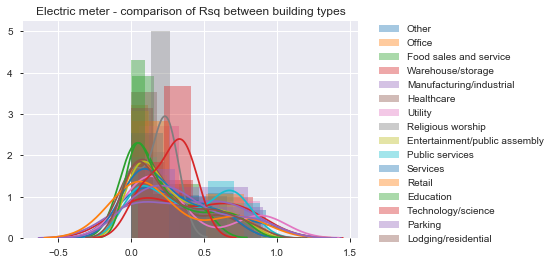

/anaconda3/envs/ASHRAE/lib/python3.7/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/anaconda3/envs/ASHRAE/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/anaconda3/envs/ASHRAE/lib/python3.7/site-packages/numpy/lib/histograms.py:898: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/anaconda3/envs/ASHRAE/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/anaconda3/envs/ASHRAE/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


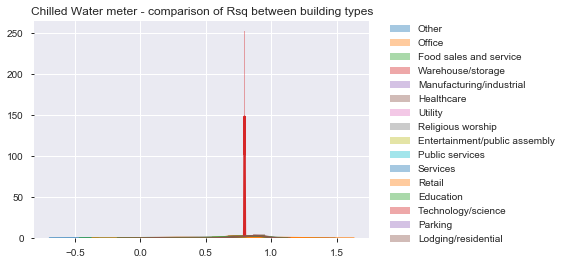

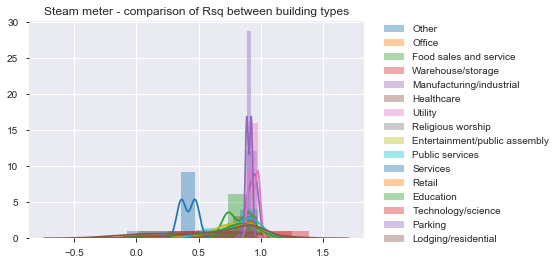

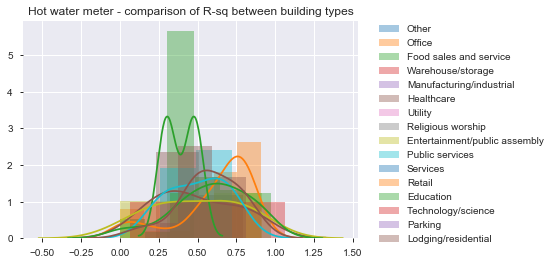

In [104]:
compare_building_uses(df_elec_weekly_results_buildtype, building, 'r_sq',
                      "Electric meter - comparison of Rsq between building types")
compare_building_uses(df_chilledwater_weekly_results_buildtype, building,'r_sq',
                      "Chilled Water meter - comparison of Rsq between building types")
compare_building_uses(df_steam_weekly_results_buildtype, building, 'r_sq',
                      "Steam meter - comparison of Rsq between building types")
compare_building_uses(df_hotwater_weekly_results_buildtype, building,'r_sq',
                      "Hot water meter - comparison of R-sq between building types")

In [105]:
del df_elec_weekly_results_buildtype, df_steam_weekly_results_buildtype
del df_chilledwater_weekly_results_buildtype
del df_hotwater_weekly_results_buildtype 

### 3.1.3 Apply coefficients to hourly dataset

In [106]:
def add_temp_based_predictions(df, df_lin_reg_results):
    
    df = df.reset_index()
    df_lin_reg_results = df_lin_reg_results[['r_sq', 'temp_coef', 'intercept',
                                             'set_point_temp', 'meter']].reset_index()
    df = df.merge(df_lin_reg_results, how='left', on=['building_id', 'meter'])
    df = df.set_index(['building_id', 'timestamp'])
    
    df['temp_based_prediction'] = df['temp_coef'] * df['air_temperature'] + df['intercept']
    
    # remove sub-zero predictions
    df['temp_based_prediction'].loc[:,df['temp_based_prediction'] < 0] = 0
    
    if 'meter_reading' in df.columns:
        df['residual'] = df['meter_reading'] - df['temp_based_prediction']
        df['squared_log_error'] = (np.log(df['temp_based_prediction'] + 1) - np.log(df['meter_reading'] + 1))**2
    return df

In [107]:
elec_train_weekly_temp_preds = add_temp_based_predictions(elec_train, df_elec_weekly_results)
chilledwater_train_weekly_temp_preds = add_temp_based_predictions(chilledwater_train,
                                                                  df_chilledwater_weekly_results)
hotwater_train_weekly_temp_preds = add_temp_based_predictions(hotwater_train, df_hotwater_weekly_results)
steam_train_weekly_temp_preds = add_temp_based_predictions(steam_train, df_steam_weekly_results)

/anaconda3/envs/ASHRAE/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [108]:
hotwater_train_weekly_temp_preds

meter  meter_reading meter_type  site_id  \
building_id timestamp                                                       
106         2016-01-01 00:00:00      3           0.00   hotwater        1   
            2016-01-01 01:00:00      3          10.00   hotwater        1   
            2016-01-01 02:00:00      3          10.00   hotwater        1   
            2016-01-01 03:00:00      3          10.00   hotwater        1   
            2016-01-01 04:00:00      3           0.00   hotwater        1   
...                                ...            ...        ...      ...   
1331        2016-12-31 19:00:00      3       10658.50   hotwater       15   
            2016-12-31 20:00:00      3        9083.54   hotwater       15   
            2016-12-31 21:00:00      3        9028.32   hotwater       15   
            2016-12-31 22:00:00      3        9079.99   hotwater       15   
            2016-12-31 23:00:00      3        8501.02   hotwater       15   

                                primary_use  square_feet  year_built  \
building_id timestamp                                                  
106         2016-01-01 00:00:00   Education         5374         NaN   
            2016-01-01 01:00:00   Education         5374         NaN   
            2016-01-01 02:00:00   Education         5374         NaN   
            2016-01-01 03:00:00   Education         5374         NaN   
            2016-01-01 04:00:00   Education         5374         NaN   
...                                     ...          ...         ...   
1331        2016-12-31 19:00:00   Education       171008      1930.0   
            2016-12-31 20:00:00   Education       171008      1930.0   
            2016-12-31 21:00:00   Education       171008      1930.0   
            2016-12-31 22:00:00   Education       171008      1930.0   
            2016-12-31 23:00:00   Education       171008      1930.0   

                                 floor_count  air_temperature  cloud_coverage  \
building_id timestamp                                                           
106         2016-01-01 00:00:00          4.0              3.8             0.0   
            2016-01-01 01:00:00          4.0              3.7             0.0   
            2016-01-01 02:00:00          4.0              2.6             0.0   
            2016-01-01 03:00:00          4.0              2.0             0.0   
            2016-01-01 04:00:00          4.0              2.3             0.0   
...                                      ...              ...             ...   
1331        2016-12-31 19:00:00          NaN              3.0             1.5   
            2016-12-31 20:00:00          NaN              2.8             2.0   
            2016-12-31 21:00:00          NaN              2.8             2.0   
            2016-12-31 22:00:00          NaN              2.2             2.0   
            2016-12-31 23:00:00          NaN              1.7             2.0   

                                 ...  week_number  month  is_weekend  \
building_id timestamp            ...                                   
106         2016-01-01 00:00:00  ...           53      1           0   
            2016-01-01 01:00:00  ...           53      1           0   
            2016-01-01 02:00:00  ...           53      1           0   
            2016-01-01 03:00:00  ...           53      1           0   
            2016-01-01 04:00:00  ...           53      1           0   
...                              ...          ...    ...         ...   
1331        2016-12-31 19:00:00  ...           52     12           0   
            2016-12-31 20:00:00  ...           52     12           0   
            2016-12-31 21:00:00  ...           52     12           0   
            2016-12-31 22:00:00  ...           52     12           0   
            2016-12-31 23:00:00  ...           52     12           0   

                                     r_sq   temp_coef     intercept  \
building_id timestamp           

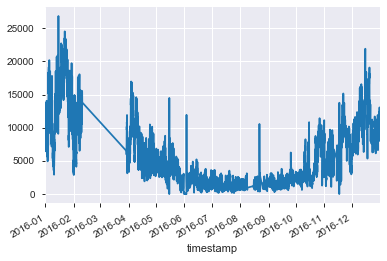

In [109]:
hotwater_train_weekly_temp_preds.loc[1331,'meter_reading'].plot()

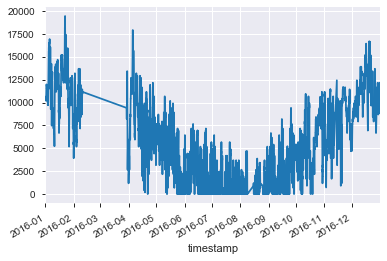

In [110]:
hotwater_train_weekly_temp_preds.loc[1331,'temp_based_prediction'].plot()

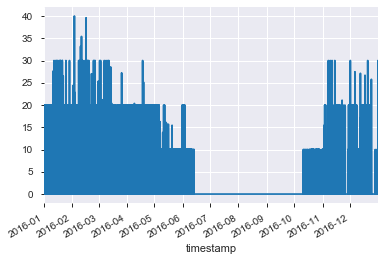

In [111]:
hotwater_train_weekly_temp_preds.loc[106,'meter_reading'].plot()

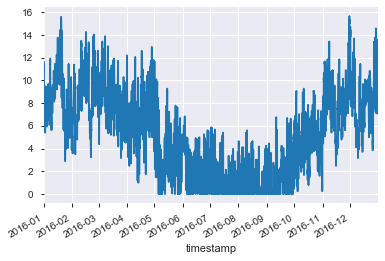

In [112]:
hotwater_train_weekly_temp_preds.loc[106,'temp_based_prediction'].plot()

Heating gets turned off in the summer. This impact is making the linear fit insufficiently sensitive to temperature for the rest of the year. Try to account for this before doing linear fit? TODO

In [113]:
# look for weeks with zero values


In [114]:
def plot_timeseries(df, variable, building_id, timestamp_start=None, timestamp_end=None, title=""):
    
    df = df.loc[building_id]
    y2=df.loc[slice(timestamp_start, timestamp_end),variable].to_numpy()
    x2=df.loc[slice(timestamp_start, timestamp_end)].index.get_level_values('timestamp').to_numpy()
    plt.xlabel('timestamp')
    plt.ylabel(variable)
    plt.scatter(x2,y2)
    plt.title(title)
    plt.show()
    

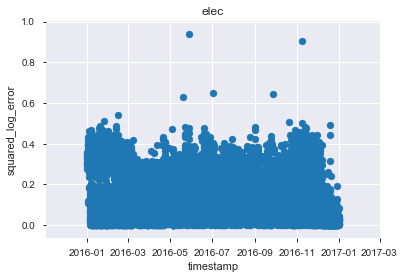

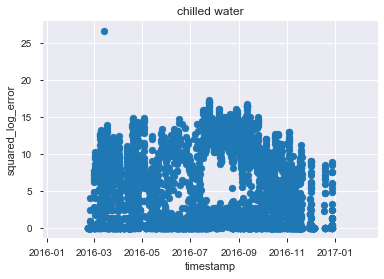

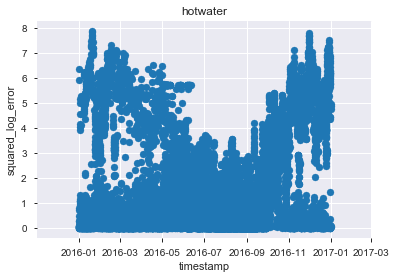

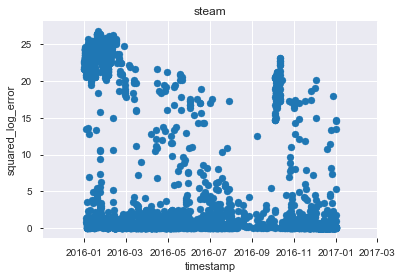

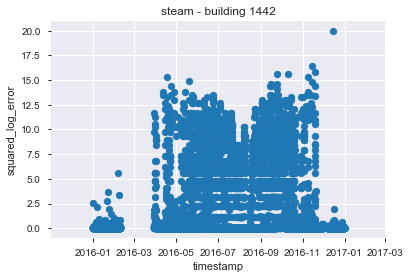

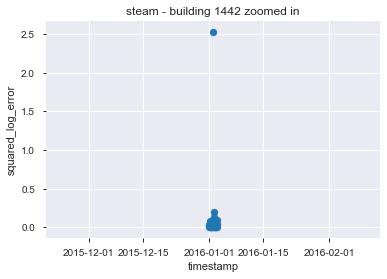

In [115]:
# plot the squared_log_error for a few dfs
plot_timeseries(elec_train_weekly_temp_preds, 'squared_log_error', 745, title='elec')
plot_timeseries(chilledwater_train_weekly_temp_preds, 'squared_log_error', 745, title='chilled water')
plot_timeseries(hotwater_train_weekly_temp_preds, 'squared_log_error', 106, title='hotwater')
plot_timeseries(steam_train_weekly_temp_preds, 'squared_log_error', 745, title='steam')

plot_timeseries(steam_train_weekly_temp_preds, 'squared_log_error', 1442, title='steam - building 1442')   
plot_timeseries(steam_train_weekly_temp_preds, 'squared_log_error', 1442, title='steam - building 1442 zoomed in',
                timestamp_start='2016-01-01 00:00:00',
                timestamp_end='2016-01-03 00:00:00') # not working nicely...


In [116]:
#suprisingly - elec data looks the best in many ways. How can this be when temp a poor correlator?
#hot water increases in the summer and decreases in the winter - add cut off temp?
# perhaps just because some very odd/erroneous values in the other datasets? Maybe the 0 values?

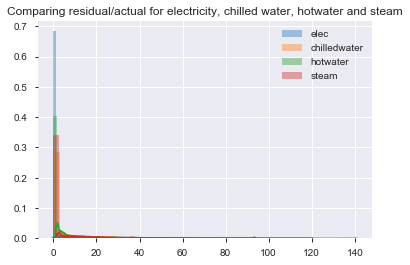

In [117]:
#plot the distribution of the log squared errors
def compare_distributions(df_dict, variable_name_dict, title):
    for df_name, df in df_dict.items():
        sns.distplot(list(df[variable_name_dict[df_name]].dropna()), label=df_name)
    plt.title(title)
    plt.legend()
    plt.show()
    
variable_name_dict = {'elec': 'squared_log_error',
                      'chilledwater':'squared_log_error',
                      'hotwater':'squared_log_error', 
                      'steam':'squared_log_error'}

df_dict_compare_errors = {'elec': elec_train_weekly_temp_preds,
                             'chilledwater': chilledwater_train_weekly_temp_preds,
                             'hotwater':hotwater_train_weekly_temp_preds,
                             'steam': steam_train_weekly_temp_preds}

compare_distributions(df_dict_compare_errors ,
                      variable_name_dict,
                     'Comparing residual/actual for electricity, chilled water, hotwater and steam')    

In [118]:
#some issues with huge erros in the steam and chilled water datasets - need to find them

In [119]:
steam_train_weekly_temp_preds

meter  meter_reading meter_type  site_id  \
building_id timestamp                                                       
745         2016-01-01 00:00:00      2         0.0000      steam        6   
            2016-01-01 01:00:00      2         0.0000      steam        6   
            2016-01-01 02:00:00      2         0.0000      steam        6   
            2016-01-01 03:00:00      2         0.0000      steam        6   
            2016-01-01 04:00:00      2         0.0000      steam        6   
...                                ...            ...        ...      ...   
1442        2016-12-31 19:00:00      2        63.4563      steam       15   
            2016-12-31 20:00:00      2        52.9570      steam       15   
            2016-12-31 21:00:00      2        70.2051      steam       15   
            2016-12-31 22:00:00      2        63.6180      steam       15   
            2016-12-31 23:00:00      2        55.6241      steam       15   

                                     primary_use  square_feet  year_built  \
building_id timestamp                                                       
745         2016-01-01 00:00:00        Education        13512         NaN   
            2016-01-01 01:00:00        Education        13512         NaN   
            2016-01-01 02:00:00        Education        13512         NaN   
            2016-01-01 03:00:00        Education        13512         NaN   
            2016-01-01 04:00:00        Education        13512         NaN   
...                                          ...          ...         ...   
1442        2016-12-31 19:00:00  Public services        99541      1993.0   
            2016-12-31 20:00:00  Public services        99541      1993.0   
            2016-12-31 21:00:00  Public services        99541      1993.0   
            2016-12-31 22:00:00  Public services        99541      1993.0   
            2016-12-31 23:00:00  Public services        99541      1993.0   

                                 floor_count  air_temperature  cloud_coverage  \
building_id timestamp                                                           
745         2016-01-01 00:00:00          NaN             10.0        0.000000   
            2016-01-01 01:00:00          NaN             10.0        0.000000   
            2016-01-01 02:00:00          NaN             10.0        0.666667   
            2016-01-01 03:00:00          NaN              9.4        1.333333   
            2016-01-01 04:00:00          NaN              7.8        2.000000   
...                                      ...              ...             ...   
1442        2016-12-31 19:00:00          NaN              3.0        1.500000   
            2016-12-31 20:00:00          NaN              2.8        2.000000   
            2016-12-31 21:00:00          NaN              2.8        2.000000   
            2016-12-31 22:00:00          NaN              2.2        2.000000   
            2016-12-31 23:00:00          NaN              1.7        2.000000   

                                 ...  week_number  month  is_weekend  \
building_id timestamp            ...                                   
745         2016-01-01 00:00:00  ...           53      1           0   
            2016-01-01 01:00:00  ...           53      1           0   
            2016-01-01 02:00:00  ...           53      1           0   
            2016-01-01 03:00:00  ...           53      1           0   
            2016-01-01 04:00:00  ...           53      1           0   
...                              ...          ...    ...         ...   
1442        2016-12-31 19:00:00  ...           52     12           0   
            2016-12-31 20:00:00  ...           52     12           0   
            2016-12-31 21:00:00  ...           52     12           0   
            2016-12-31 22:00:00  ...           52     12           0   
            2016-12-31 23:00:00  ...           52     12           0   

                                     r

### 3.1.4 Evaluate performance of simple linear regression based on weekly averages

In [122]:
def extract_predictions(df, column_header):
    predictions = df[column_header].to_numpy()
    predictions[predictions < 0] = 0
    return predictions

In [123]:
#elec
elec_predictions = extract_predictions(elec_train_weekly_temp_preds,'temp_based_prediction')
elec_actuals = elec_train_weekly_temp_preds['meter_reading'].to_numpy()
calculate_RMSLE_score(elec_predictions, elec_actuals)

0.6863533241514536

In [124]:
#chilledwater
chilledwater_predictions = extract_predictions(chilledwater_train_weekly_temp_preds,'temp_based_prediction')
chilledwater_actuals = chilledwater_train_weekly_temp_preds['meter_reading'].to_numpy()
calculate_RMSLE_score(chilledwater_predictions, chilledwater_actuals)

1.9142380509528318

In [125]:
#hotwater
hotwater_predictions = extract_predictions(hotwater_train_weekly_temp_preds,'temp_based_prediction')
hotwater_actuals = hotwater_train_weekly_temp_preds['meter_reading'].to_numpy()
calculate_RMSLE_score(hotwater_predictions, hotwater_actuals)

1.9245298934259893

In [126]:
#steam
steam_predictions = extract_predictions(steam_train_weekly_temp_preds,'temp_based_prediction')
steam_actuals = steam_train_weekly_temp_preds['meter_reading'].to_numpy()
calculate_RMSLE_score(steam_predictions, steam_actuals)

1.9207773626466587

In [127]:
# all together
predictions = np.concatenate([elec_predictions, chilledwater_predictions,hotwater_predictions, steam_predictions])
actuals = np.concatenate([elec_actuals, chilledwater_actuals,hotwater_actuals, steam_actuals])
calculate_RMSLE_score(predictions, actuals)

1.3370144760569052

### 3.1.5 Produce a set of predictions on the test set based on this weekly average temperature model

In [128]:
def add_weather_variables_to_test_df(test, building, weather, weather_variables):
    
    # add site id to test data
    building_site_id = building[['site_id','building_id']].set_index('building_id').to_dict()['site_id']
    test_with_site_id = test.copy()
    test_with_site_id['site_id'] = test_with_site_id['building_id'].map(building_site_id )
    
    # add required weather variables to test data
    required_weather = weather[['site_id', 'timestamp'] + weather_variables]
    all_df = test_with_site_id.merge(required_weather, on = ['site_id', 'timestamp'], how='left')
    
    #multi index on building id and timestamp to match previous format
    all_df = all_df.set_index(['building_id', 'timestamp']).sort_index()
    
    return all_df

In [129]:
test_with_air_temp = add_weather_variables_to_test_df(test, building, weather_test, ['air_temperature'])

In [130]:
# very slow
test_weekly_temp_preds = add_temp_based_predictions(test_with_air_temp, df_weekly_results)

In [131]:
test_with_air_temp

row_id  meter   meter_type  site_id  \
building_id timestamp                                                    
0           2017-01-01 00:00:00         0      0  electricity        0   
            2017-01-01 01:00:00       129      0  electricity        0   
            2017-01-01 02:00:00       258      0  electricity        0   
            2017-01-01 03:00:00       387      0  electricity        0   
            2017-01-01 04:00:00       516      0  electricity        0   
...                                   ...    ...          ...      ...   
1448        2018-12-31 19:00:00  41497570      0  electricity       15   
            2018-12-31 20:00:00  41497820      0  electricity       15   
            2018-12-31 21:00:00  41498070      0  electricity       15   
            2018-12-31 22:00:00  41498320      0  electricity       15   
            2018-12-31 23:00:00  41498570      0  electricity       15   

                                 air_temperature  
building_id timestamp                             
0           2017-01-01 00:00:00             17.8  
            2017-01-01 01:00:00             17.8  
            2017-01-01 02:00:00             16.1  
            2017-01-01 03:00:00             17.2  
            2017-01-01 04:00:00             16.7  
...                                          ...  
1448        2018-12-31 19:00:00              3.3  
            2018-12-31 20:00:00              2.8  
            2018-12-31 21:00:00              2.8  
            2018-12-31 22:00:00              2.8  
            2018-12-31 23:00:00              3.3  

[41697600 rows x 5 columns]

In [132]:
test_weekly_temp_preds

row_id  meter   meter_type  site_id  \
building_id timestamp                                                    
0           2017-01-01 00:00:00         0      0  electricity        0   
            2017-01-01 01:00:00       129      0  electricity        0   
            2017-01-01 02:00:00       258      0  electricity        0   
            2017-01-01 03:00:00       387      0  electricity        0   
            2017-01-01 04:00:00       516      0  electricity        0   
...                                   ...    ...          ...      ...   
1448        2018-12-31 19:00:00  41497570      0  electricity       15   
            2018-12-31 20:00:00  41497820      0  electricity       15   
            2018-12-31 21:00:00  41498070      0  electricity       15   
            2018-12-31 22:00:00  41498320      0  electricity       15   
            2018-12-31 23:00:00  41498570      0  electricity       15   

                                 air_temperature      r_sq  temp_coef  \
building_id timestamp                                                   
0           2017-01-01 00:00:00             17.8  0.615900   9.206641   
            2017-01-01 01:00:00             17.8  0.615900   9.206641   
            2017-01-01 02:00:00             16.1  0.615900   9.206641   
            2017-01-01 03:00:00             17.2  0.615900   9.206641   
            2017-01-01 04:00:00             16.7  0.615900   9.206641   
...                                          ...       ...        ...   
1448        2018-12-31 19:00:00              3.3  0.400999  -0.017766   
            2018-12-31 20:00:00              2.8  0.400999  -0.017766   
            2018-12-31 21:00:00              2.8  0.400999  -0.017766   
            2018-12-31 22:00:00              2.8  0.400999  -0.017766   
            2018-12-31 23:00:00              3.3  0.400999  -0.017766   

                                 intercept  set_point_temp  \
building_id timestamp                                        
0           2017-01-01 00:00:00   6.583601       -0.715093   
            2017-01-01 01:00:00   6.583601       -0.715093   
            2017-01-01 02:00:00   6.583601       -0.715093   
            2017-01-01 03:00:00   6.583601       -0.715093   
            2017-01-01 04:00:00   6.583601       -0.715093   
...                                    ...             ...   
1448        2018-12-31 19:00:00   3.530175      198.703946   
            2018-12-31 20:00:00   3.530175      198.703946   
            2018-12-31 21:00:00   3.530175      198.703946   
            2018-12-31 22:00:00   3.530175      198.703946   
            2018-12-31 23:00:00   3.530175      198.703946   

                                 temp_based_prediction  
building_id timestamp                                   
0           2017-01-01 00:00:00             170.461809  
            2017-01-01 01:00:00             170.461809  
            2017-01-01 02:00:00             154.810519  
            2017-01-01 03:00:00             164.937824  
            2017-01-01 04:00:00             160.334504  
...                                                ...  
1448        2018-12-31 19:00:00               3.471547  
            2018-12-31 20:00:00               3.480430  
            2018-12-31 21:00:00               3.480430  
            2018-12-31 22:00:00               3.480430  
            2018-12-31 23:00:00               3.471547  

[41697600 rows x 10 columns]

In [133]:
predictions = test_weekly_temp_preds[['row_id', 'temp_based_prediction']].copy()
predictions = predictions.reset_index()[['row_id', 'temp_based_prediction']]
predictions = predictions.set_index('row_id')
predictions = predictions.rename(columns = {'temp_based_prediction':'meter_reading'})
predictions = predictions.sort_index(0)

In [134]:
predictions

,meter_reading
row_id,
0,170.461809
1,82.442666
2,8.835770
3,315.626380
4,1377.208553
...,...
41697595,7.446401
41697596,4.739106
41697597,3.608644


In [135]:
#predictions.to_csv('weekly_temp_means_submission.csv')

In [136]:
len(predictions)

41697600

### 3.1.6 Look at what correlates with the residuals

In [137]:
elec_residuals_corr = produce_correlation_df(elec_train_weekly_temp_preds, y_variable='residual')
hotwater_residuals_corr = produce_correlation_df(hotwater_train_weekly_temp_preds, y_variable='residual')
chilledwater_residuals_corr = produce_correlation_df(chilledwater_train_weekly_temp_preds, y_variable='residual')
steam_residuals_corr = produce_correlation_df(steam_train_weekly_temp_preds, y_variable='residual')

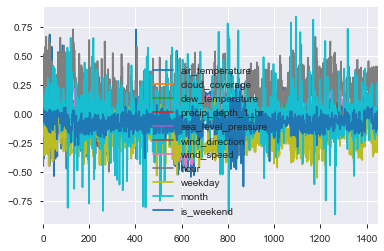

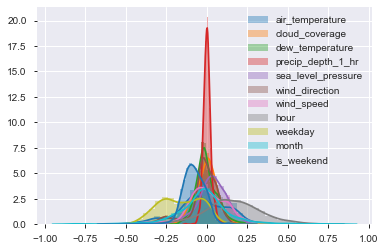

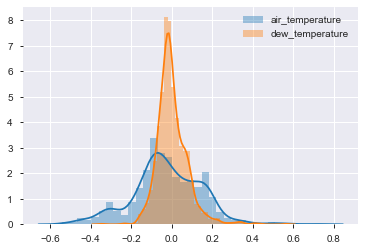

In [138]:
explore_correlations(elec_residuals_corr)

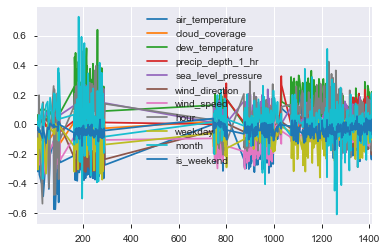

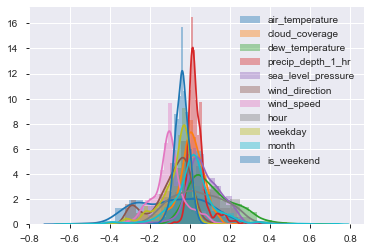

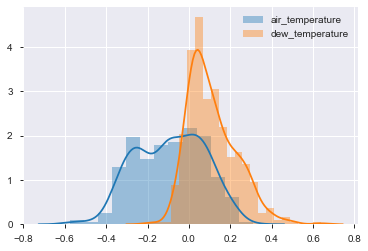

In [139]:
explore_correlations(chilledwater_residuals_corr)

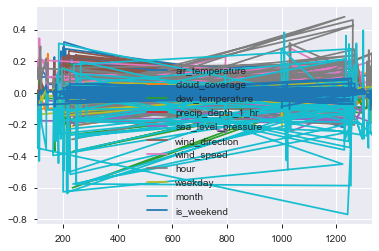

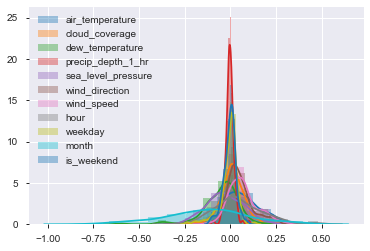

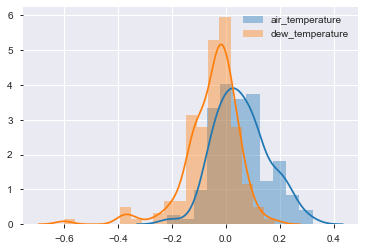

In [140]:
explore_correlations(hotwater_residuals_corr)

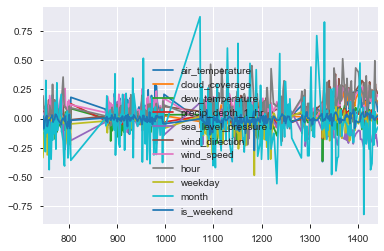

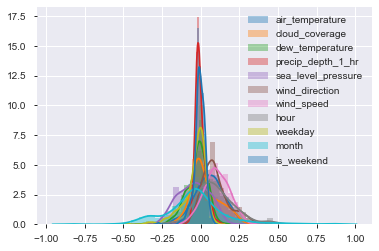

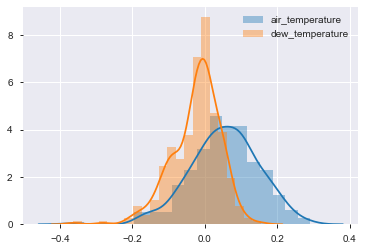

In [141]:
explore_correlations(steam_residuals_corr)

In [142]:
# Hmm - why is there any signal left in air temp? I suppose the temperature dependance is not independant of time.
# Perhaps because the set point temperature changes with time
# Time seems important. As a dump option, try and just add the whole residual back onto the test set?


### 3.1.7 Add residuals back in to temp based predictions 

This will obviously give perfect results here but worth a submission attempt in case it works well
Won't deal with the variation in set point temperature well but should do an ok job with the other time dependance

In [148]:
elec_resids = elec_train_weekly_temp_preds[['meter', 'residual']]
hotwater_resids = hotwater_train_weekly_temp_preds[['meter', 'residual']]
steam_resids = steam_train_weekly_temp_preds[['meter', 'residual']]
chilledwater_resids = chilledwater_train_weekly_temp_preds[['meter', 'residual']]

In [155]:
all_resids = elec_resids.append([hotwater_resids, steam_resids, chilledwater_resids ])

In [156]:
all_resids

meter    residual
building_id timestamp                             
0           2016-05-20 01:00:00      0 -236.749623
            2016-05-20 02:00:00      0 -216.495013
            2016-05-20 03:00:00      0 -216.495013
            2016-05-20 04:00:00      0 -216.495013
            2016-05-20 05:00:00      0 -206.367708
...                                ...         ...
1413        2016-12-31 19:00:00      1    0.045982
            2016-12-31 20:00:00      1   -0.168580
            2016-12-31 21:00:00      1    0.054720
            2016-12-31 22:00:00      1   -0.038767
            2016-12-31 23:00:00      1   -0.396573

[19869886 rows x 2 columns]

In [143]:
test_weekly_temp_preds

row_id  meter   meter_type  site_id  \
building_id timestamp                                                    
0           2017-01-01 00:00:00         0      0  electricity        0   
            2017-01-01 01:00:00       129      0  electricity        0   
            2017-01-01 02:00:00       258      0  electricity        0   
            2017-01-01 03:00:00       387      0  electricity        0   
            2017-01-01 04:00:00       516      0  electricity        0   
...                                   ...    ...          ...      ...   
1448        2018-12-31 19:00:00  41497570      0  electricity       15   
            2018-12-31 20:00:00  41497820      0  electricity       15   
            2018-12-31 21:00:00  41498070      0  electricity       15   
            2018-12-31 22:00:00  41498320      0  electricity       15   
            2018-12-31 23:00:00  41498570      0  electricity       15   

                                 air_temperature      r_sq  temp_coef  \
building_id timestamp                                                   
0           2017-01-01 00:00:00             17.8  0.615900   9.206641   
            2017-01-01 01:00:00             17.8  0.615900   9.206641   
            2017-01-01 02:00:00             16.1  0.615900   9.206641   
            2017-01-01 03:00:00             17.2  0.615900   9.206641   
            2017-01-01 04:00:00             16.7  0.615900   9.206641   
...                                          ...       ...        ...   
1448        2018-12-31 19:00:00              3.3  0.400999  -0.017766   
            2018-12-31 20:00:00              2.8  0.400999  -0.017766   
            2018-12-31 21:00:00              2.8  0.400999  -0.017766   
            2018-12-31 22:00:00              2.8  0.400999  -0.017766   
            2018-12-31 23:00:00              3.3  0.400999  -0.017766   

                                 intercept  set_point_temp  \
building_id timestamp                                        
0           2017-01-01 00:00:00   6.583601       -0.715093   
            2017-01-01 01:00:00   6.583601       -0.715093   
            2017-01-01 02:00:00   6.583601       -0.715093   
            2017-01-01 03:00:00   6.583601       -0.715093   
            2017-01-01 04:00:00   6.583601       -0.715093   
...                                    ...             ...   
1448        2018-12-31 19:00:00   3.530175      198.703946   
            2018-12-31 20:00:00   3.530175      198.703946   
            2018-12-31 21:00:00   3.530175      198.703946   
            2018-12-31 22:00:00   3.530175      198.703946   
            2018-12-31 23:00:00   3.530175      198.703946   

                                 temp_based_prediction  
building_id timestamp                                   
0           2017-01-01 00:00:00             170.461809  
            2017-01-01 01:00:00             170.461809  
            2017-01-01 02:00:00             154.810519  
            2017-01-01 03:00:00             164.937824  
            2017-01-01 04:00:00             160.334504  
...                                                ...  
1448        2018-12-31 19:00:00               3.471547  
            2018-12-31 20:00:00               3.480430  
            2018-12-31 21:00:00               3.480430  
            2018-12-31 22:00:00               3.480430  
            2018-12-31 23:00:00               3.471547  

[41697600 rows x 10 columns]

## 3.2 Air temperaure - hourly data

### 3.2.1 Fit to hourly data

In [ ]:
df_steam_hourly_results = fit_linear_regression_to_air_temp_data(steam_train)
df_chilledwater_hourly_results = fit_linear_regression_to_air_temp_data(chilledwater_train)
df_hotwater_hourly_results = fit_linear_regression_to_air_temp_data(hotwater_train)
df_elec_hourly_results = fit_linear_regression_to_air_temp_data(elec_train) 

In [ ]:
#add meter numbers (this is kinda silly - should just keep them in earlier)
df_elec_hourly_results['meter'] = 0
df_chilledwater_hourly_results['meter'] = 1
df_steam_hourly_results['meter'] = 2
df_hotwater_hourly_results['meter'] = 3

In [ ]:
variable_name_dict = {'steam':'r_sq',
                      'hotwater':'r_sq',
                      'chilledwater':'r_sq',
                      'elec':'r_sq'}

compare_distributions({'steam':df_steam_weekly_results,
                      'hotwater': df_hotwater_weekly_results,
                      'chilledwater':df_chilledwater_weekly_results,
                      'elec': df_elec_weekly_results},
                      variable_name_dict,
                      'r_sq - based on weekly means')

compare_distributions({'steam':df_steam_hourly_results,
                      'hotwater': df_hotwater_hourly_results,
                      'chilledwater':df_chilledwater_hourly_results,
                      'elec': df_elec_hourly_results},
                      variable_name_dict,
                      'r_sq - based on hourly data')

### 3.2.3 Evaluate performance of simple linear regression based on hourly temp data

In [ ]:
elec_train_hourly_temp_preds = add_temp_based_predictions(elec_train, df_elec_hourly_results)
chilledwater_train_hourly_temp_preds = add_temp_based_predictions(chilledwater_train,
                                                                  df_chilledwater_hourly_results)
hotwater_train_hourly_temp_preds = add_temp_based_predictions(hotwater_train, df_hotwater_hourly_results)
steam_train_hourly_temp_preds = add_temp_based_predictions(steam_train, df_steam_hourly_results)

In [ ]:
elec_predictions = extract_predictions(elec_train_hourly_temp_preds,'temp_based_prediction')
elec_actuals = elec_train_hourly_temp_preds['meter_reading'].to_numpy()
calculate_RMSLE_score(elec_predictions, elec_actuals)

In [ ]:
chilledwater_predictions = extract_predictions(chilledwater_train_hourly_temp_preds,'temp_based_prediction')
chilledwater_actuals = chilledwater_train_hourly_temp_preds['meter_reading'].to_numpy()
calculate_RMSLE_score(chilledwater_predictions, chilledwater_actuals)

In [ ]:
hotwater_predictions = extract_predictions(hotwater_train_hourly_temp_preds,'temp_based_prediction')
hotwater_actuals = hotwater_train_hourly_temp_preds['meter_reading'].to_numpy()
calculate_RMSLE_score(hotwater_predictions, hotwater_actuals)

In [ ]:
steam_predictions = extract_predictions(steam_train_hourly_temp_preds,'temp_based_prediction')
steam_actuals = steam_train_hourly_temp_preds['meter_reading'].to_numpy()
calculate_RMSLE_score(steam_predictions, steam_actuals)

In [ ]:
# all together
predictions = np.concatenate([elec_predictions, chilledwater_predictions,hotwater_predictions, steam_predictions])
actuals = np.concatenate([elec_actuals, chilledwater_actuals,hotwater_actuals, steam_actuals])
calculate_RMSLE_score(predictions, actuals)

In [ ]:
# so the hourly model actually does better. Perhaps because it intrinsically deals with some time dependance?

# Learnings

- Weather data is for 1 year - 2016
- Their are 16 sites we have weather data for
- Temperature data is good - no missing values. Other weather data less so. 
- Weather data and meter data is missing some hours of the year. Meter data has all hours that weather data has
- No clear pattern to where data is missing
<br/>

- There can be multiple meters per building
- We need to learn seperate models for each meter. It may be hard to generalise learnings for the same building. 
- We need to predict meter readings hourly
<br/>

- Weekly mean air temperature strongly and consistently correlates with mean meter reading for all meaters apart from electricity 
- Weekly degree hours also strongly correlation with total weekly consumption - but relationship is slightly less good than for averages. Could be because of the changing balance point
- Other weather data not particularly important - so start with temperature
- Time dependance not really explored yet - instead learning attibutes about temperature dependance based on weekly data and then using those for hourly data
- The strength of temperature as a predictor varies between building types - It is strongest for office buildings and lodging/residential. Education buildings have much bigger drop offs in the summer than you would expect based on temperature alone - presumeably because they are not used

# To Explore

- make a meter object...?
- some part of meter reading should correlate with temperature - what about summing all of the meter readings together and seeing then seperating out use? Issue is that we don't know if they are in the same unit
- change timestamp data to local time
- Add residuals back in just based on building, meter and timestamp

